In [7]:
import torch
import albumentations as A
from albumentations.pytorch import ToTensorV2
from tqdm import tqdm
import torch.nn as nn
import torch.optim as optim
from unet_model import UNET
import matplotlib.pyplot as plt
import cv2
from PIL import Image

from utils import (
    load_checkpoint,
    save_checkpoint,
    get_loaders,
    check_accuracy,
    save_predictions_as_imgs,
)

import os

# Hyperparameters etc.
LEARNING_RATE = 1e-4
# DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
device = "4" # Put the GPU ID here 

# .to(device)

# .to("cuda:6")
# .cuda()

BATCH_SIZE = 1
NUM_EPOCHS = 3
NUM_WORKERS = 2
IMAGE_HEIGHT = 160 
IMAGE_WIDTH = 240
PIN_MEMORY = True
LOAD_MODEL = False

TRAIN_IMG_DIR = "/DATA/bitra1/data_divs/train/data/"
TRAIN_MASK_DIR = "/DATA/bitra1/mask_divs/train/"
VAL_IMG_DIR = "/DATA/bitra1/data_divs/val/data/"
VAL_MASK_DIR = "/DATA/bitra1/mask_divs/val/"
TEST_IMG_DIR = "/DATA/bitra1/data_divs/test/data/"
TEST_MASK_DIR = "/DATA/bitra1/mask_divs/test/"


os.environ['CUDA_VISIBLE_DEVICES'] = device

  0%|          | 0/331 [00:00<?, ?it/s]

Got 137697/3609600 with acc 3.81
Dice score: 0.0


  0%|          | 0/331 [00:00<?, ?it/s]

Got 11829332/12710400 with acc 93.07
Dice score: 318.6991882324219


  0%|          | 0/331 [00:00<?, ?it/s]

Got 12075517/12710400 with acc 95.01
Dice score: 322.263916015625


100%|██████████| 331/331 [00:28<00:00, 11.73it/s, loss=0.165]


Got 12165747/12710400 with acc 95.71
Dice score: 323.6136779785156
=> Saving checkpoint
Got 3482067/3609600 with acc 96.47
Dice score: 92.26593780517578
LENGTH OF LOADER =  94
TYPE OF LOADER =  <class 'torch.utils.data.dataloader.DataLoader'>
92_1.jpg


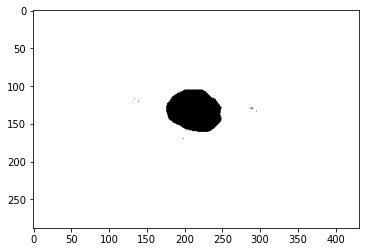

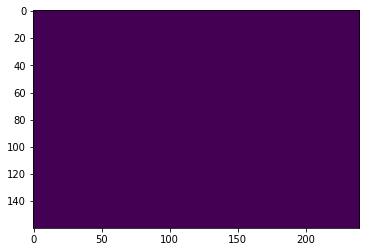

93_2.jpg


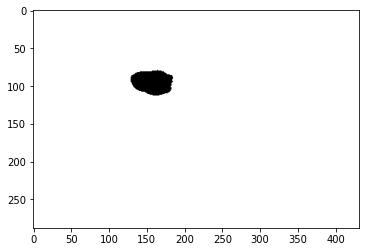

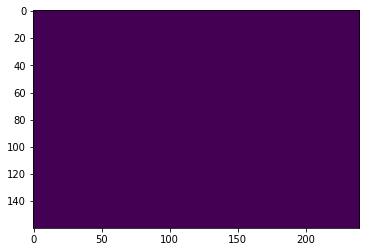

271_1.jpg


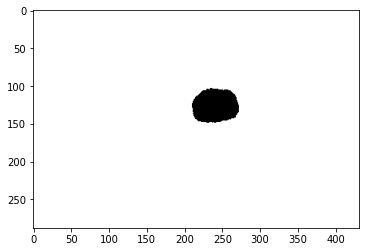

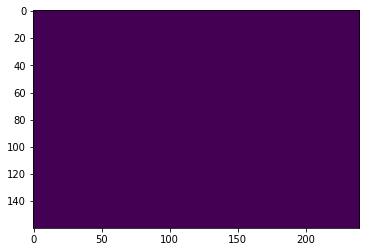

177_2.jpg


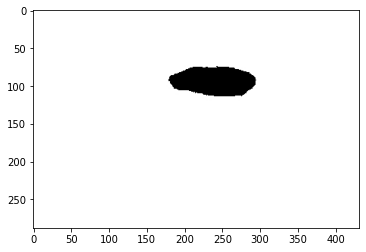

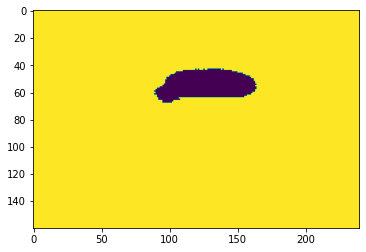

283_1.jpg


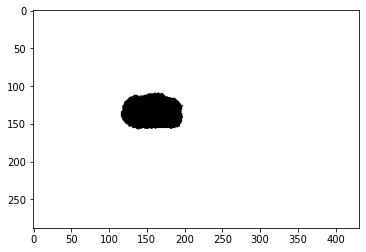

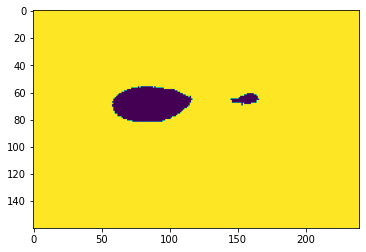

9_1.jpg


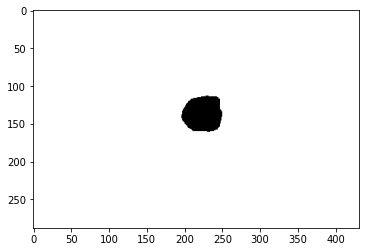

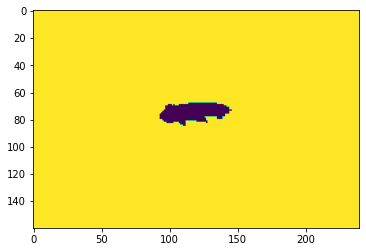

45_1.jpg


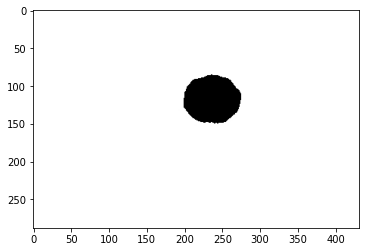

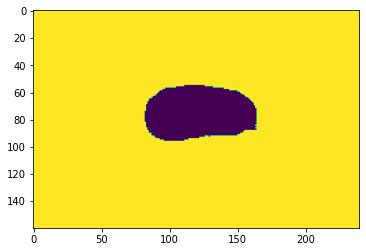

140_1.jpg


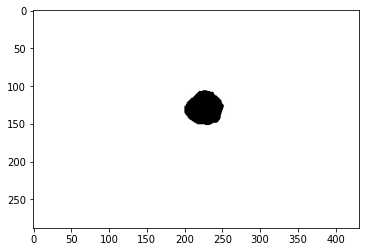

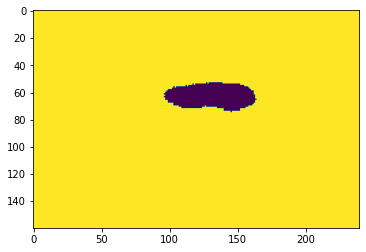

346_1.jpg


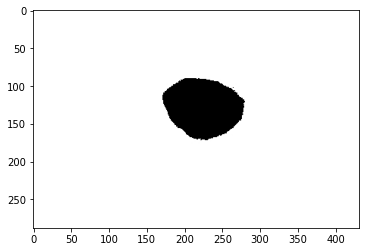

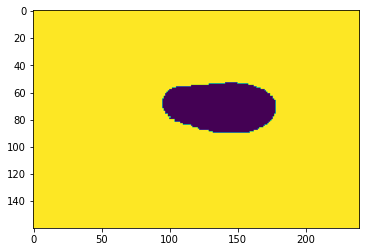

391_1.jpg


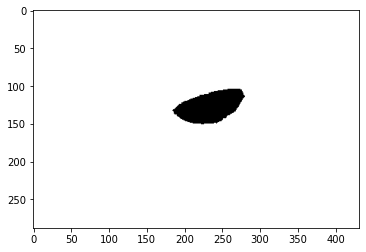

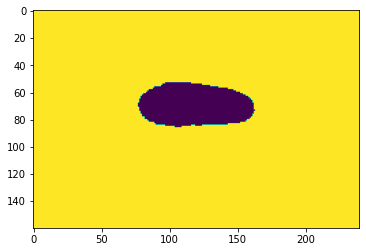

61_1.jpg


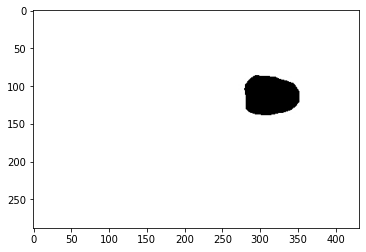

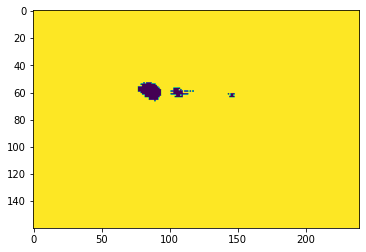

62_1.jpg


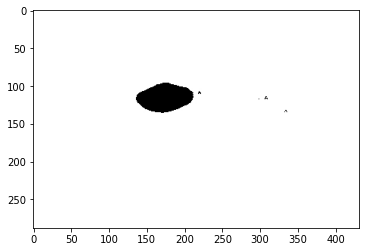

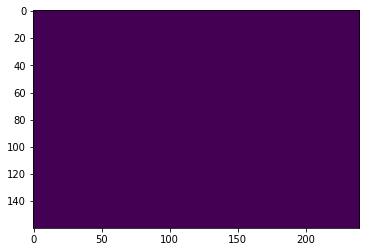

158_2.jpg


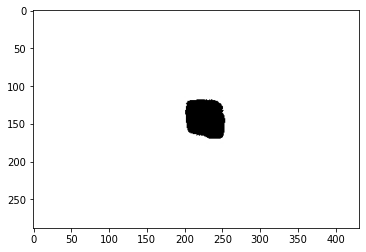

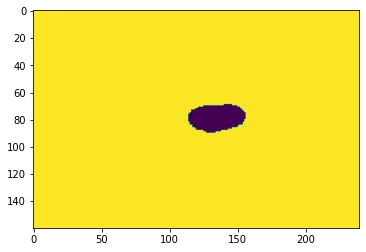

319_2.jpg


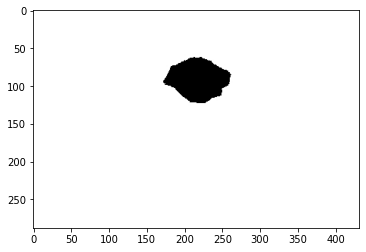

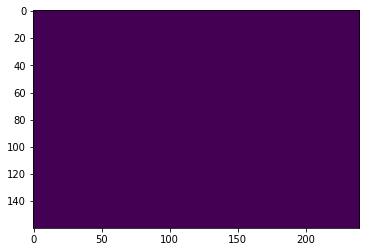

222_1.jpg


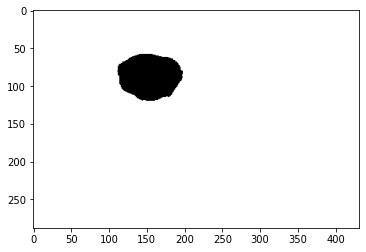

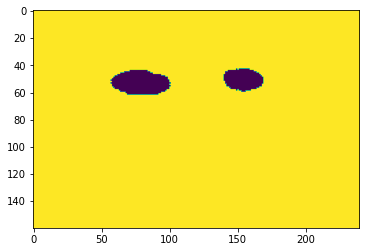

334_2.jpg


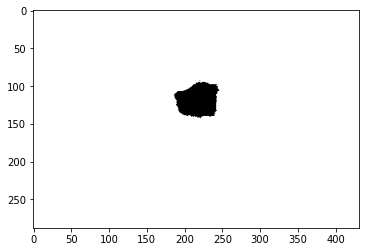

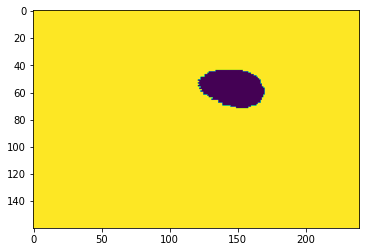

119_1.jpg


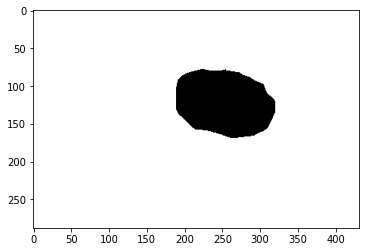

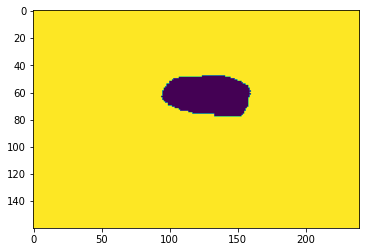

125_1.jpg


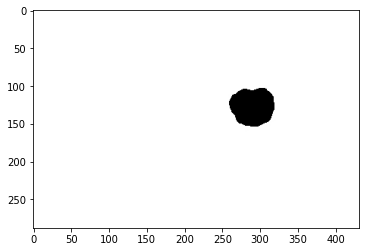

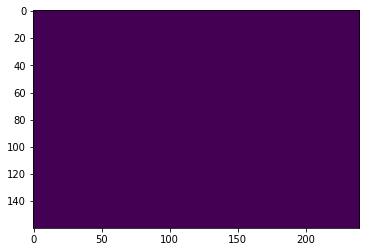

35_1.jpg


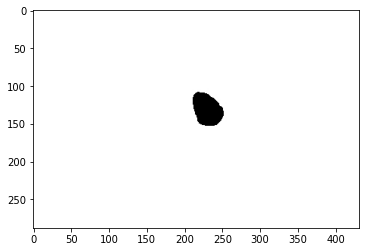

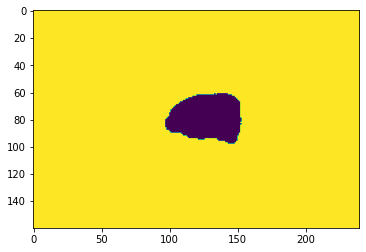

132_1.jpg


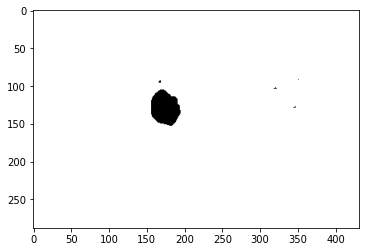

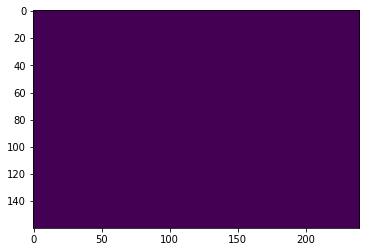

75_2.jpg


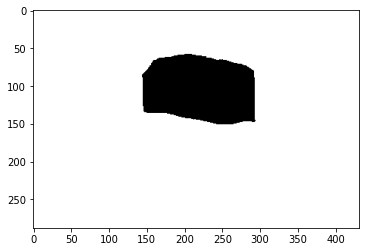

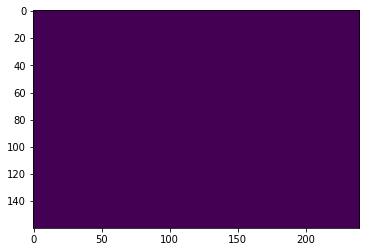

378_1.jpg


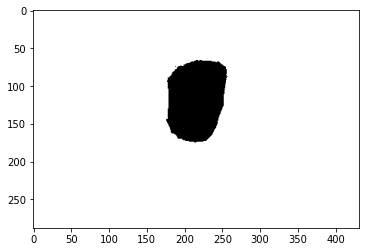

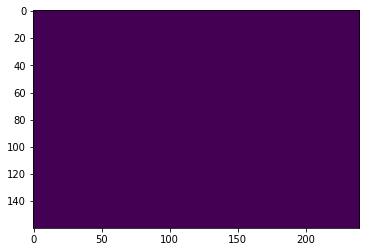

189_2.jpg


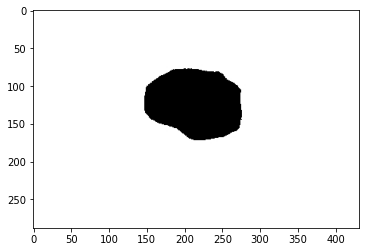

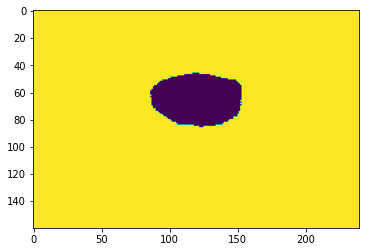

345_1.jpg


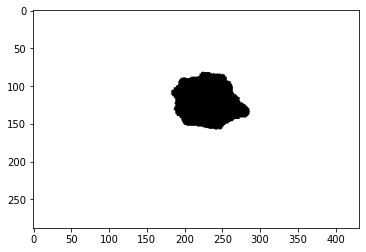

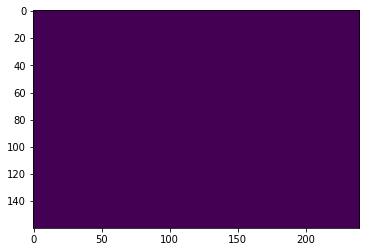

62_3.jpg


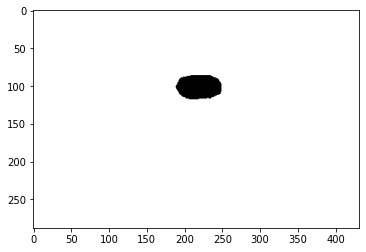

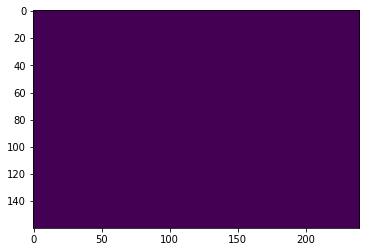

15_1.jpg


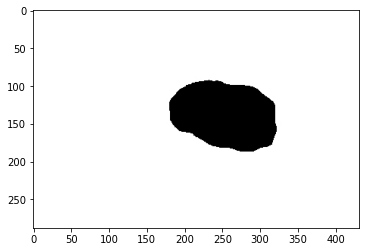

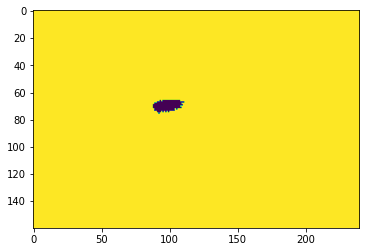

12_1.jpg


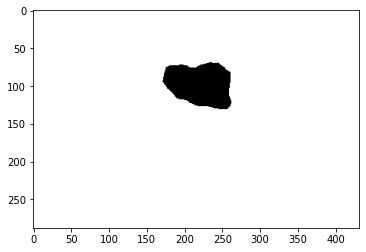

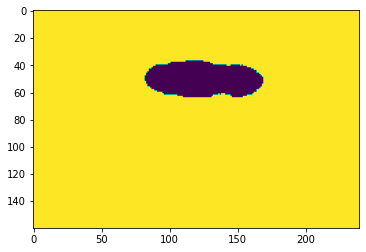

176_1.jpg


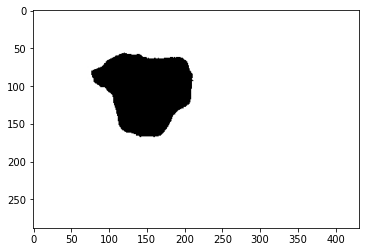

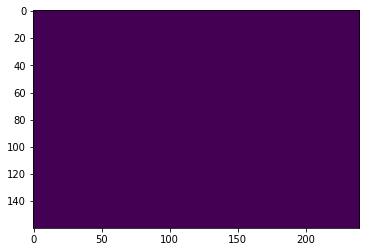

341_1.jpg


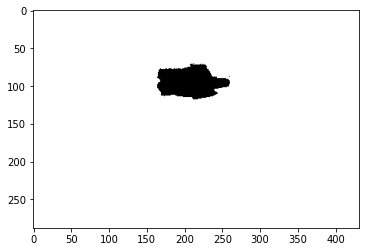

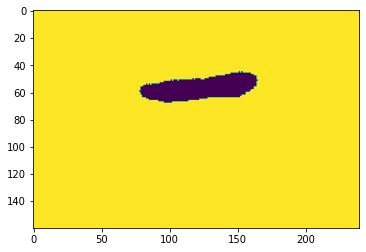

73_1.jpg


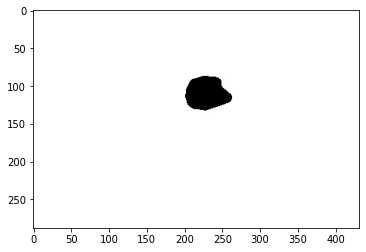

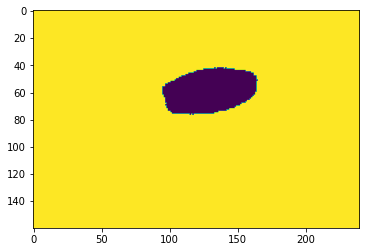

343_1.jpg


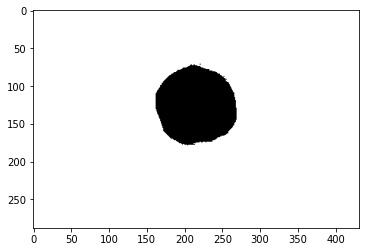

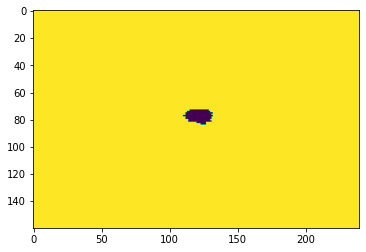

32_1.jpg


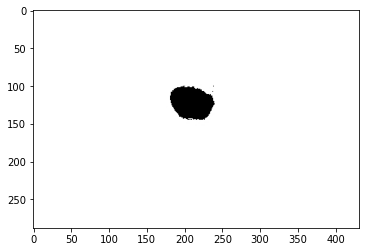

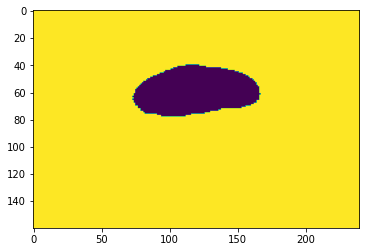

210_2.jpg


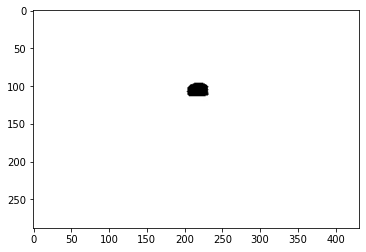

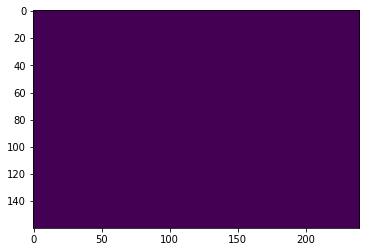

308_1.jpg


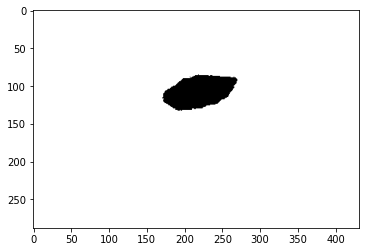

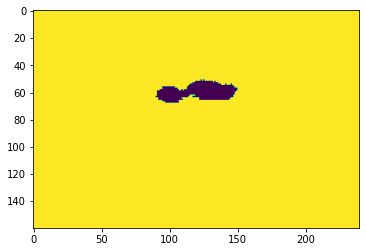

276_1.jpg


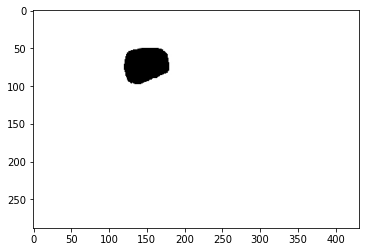

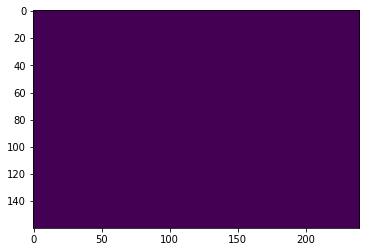

74_1.jpg


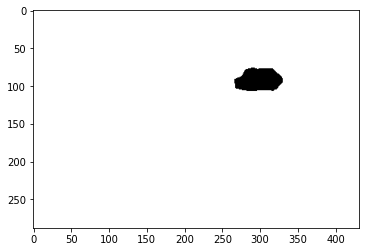

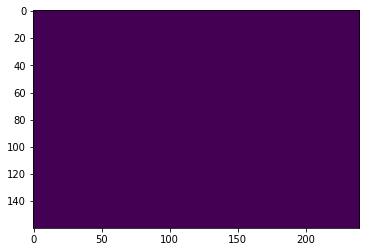

332_1.jpg


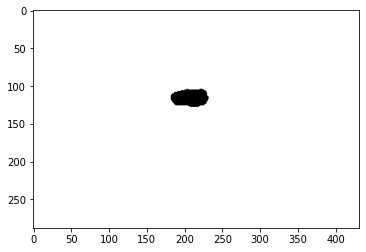

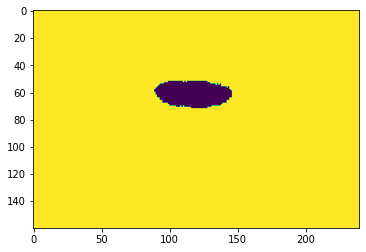

55_1.jpg


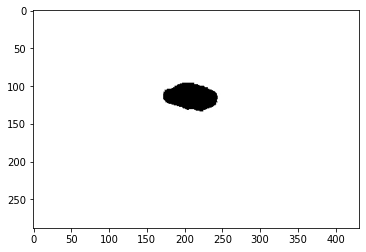

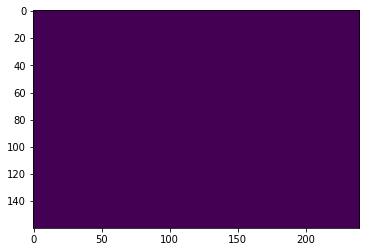

50_1.jpg


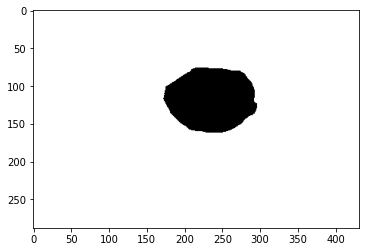

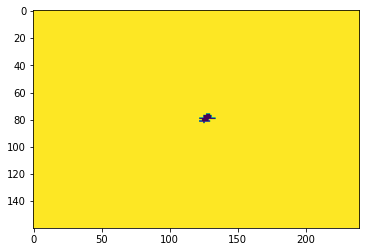

353_1.jpg


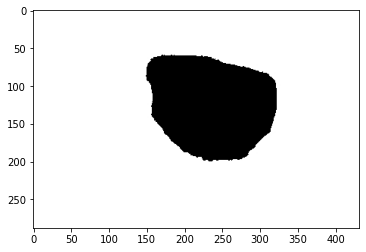

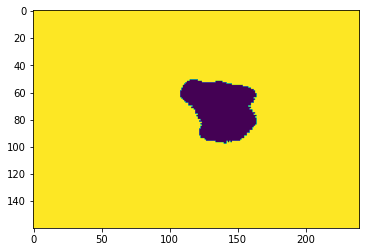

170_1.jpg


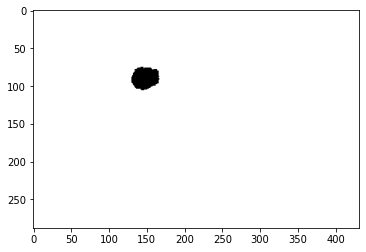

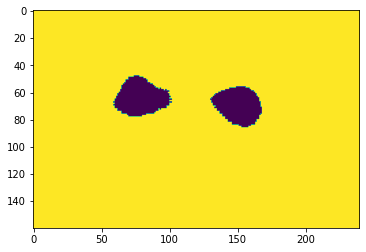

129_1.jpg


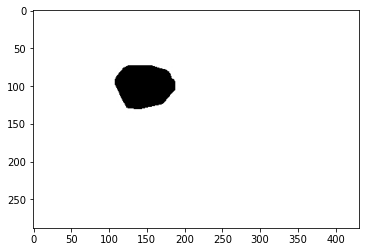

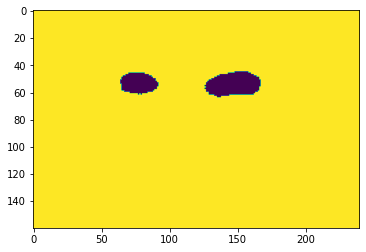

315_2.jpg


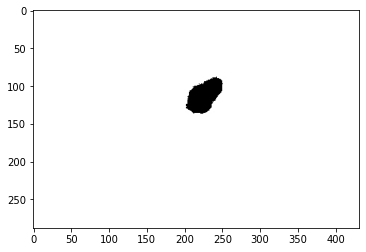

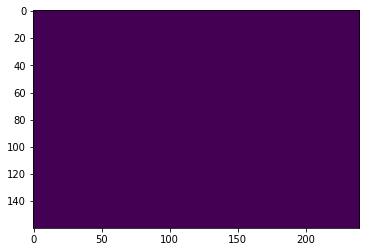

203_1.jpg


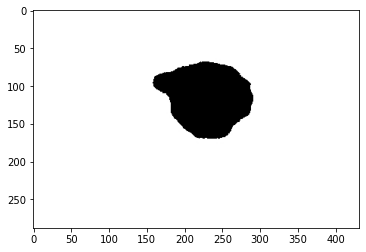

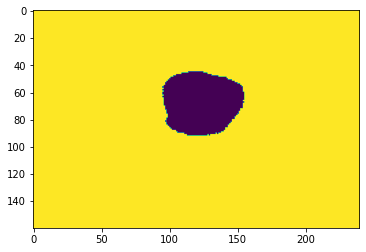

211_1.jpg


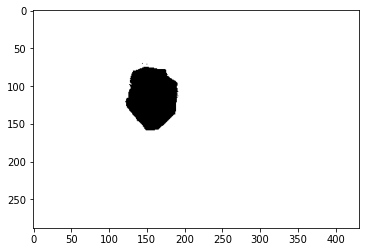

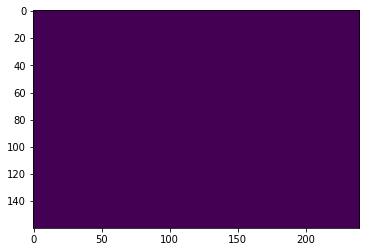

399_1.jpg


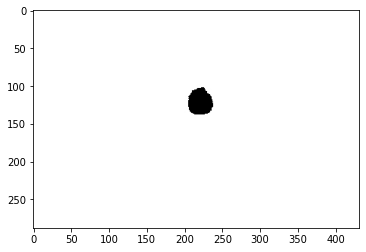

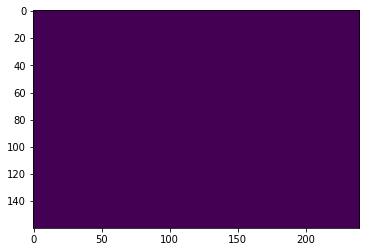

172_1.jpg


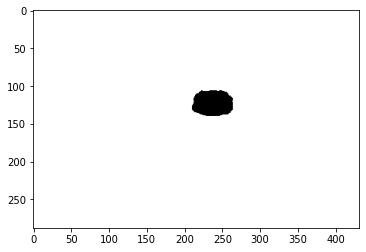

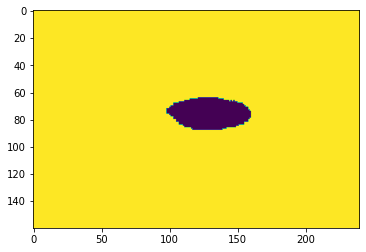

368_1.jpg


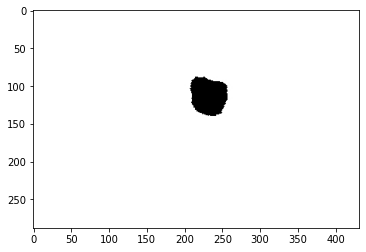

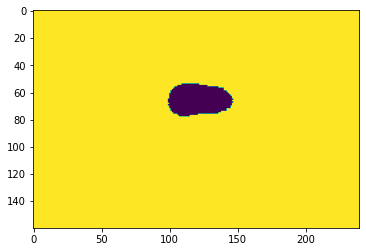

234_2.jpg


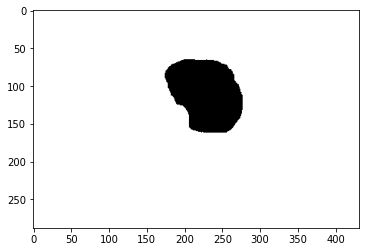

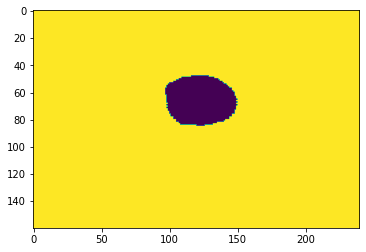

284_1.jpg


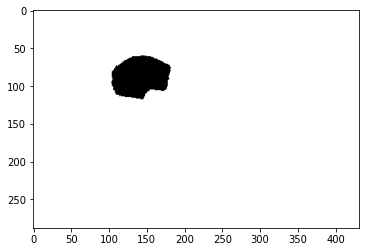

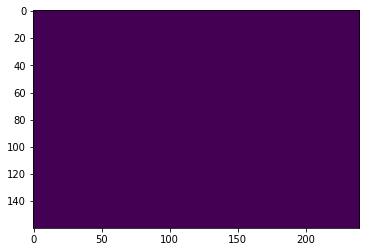

272_1.jpg


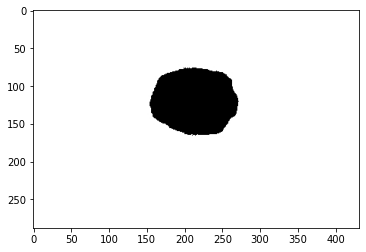

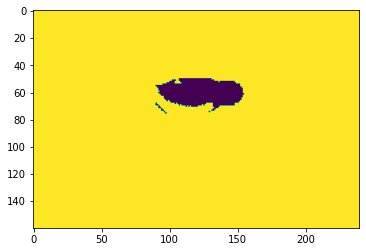

19_1.jpg


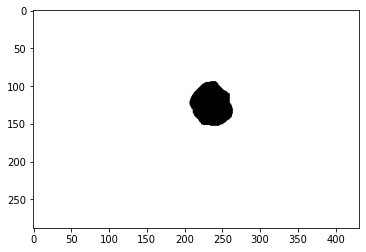

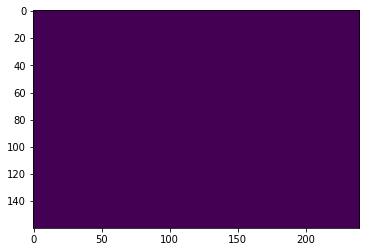

286_1.jpg


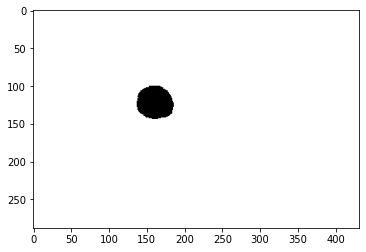

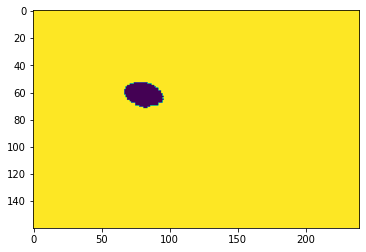

118_1.jpg


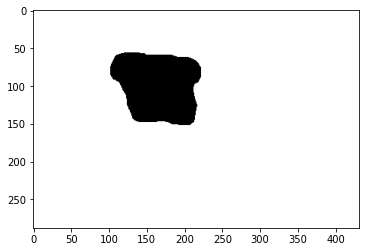

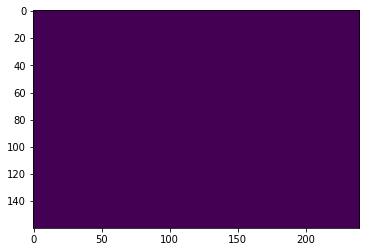

95_1.jpg


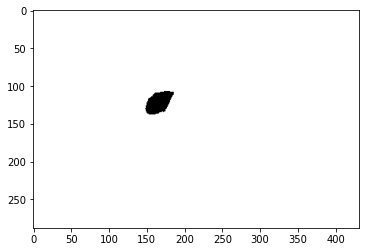

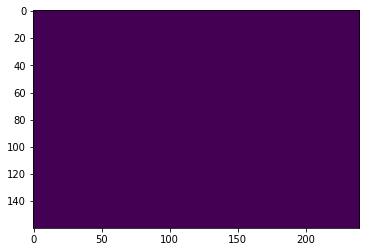

342_1.jpg


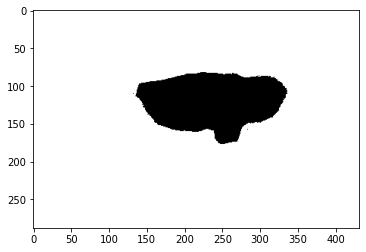

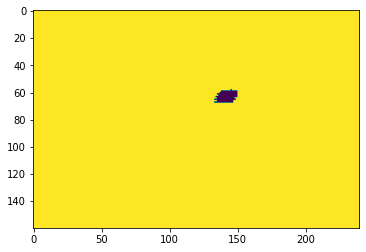

80_2.jpg


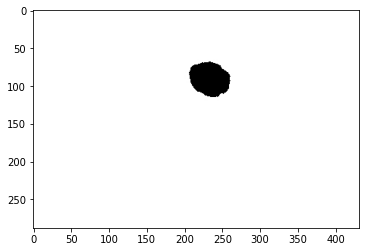

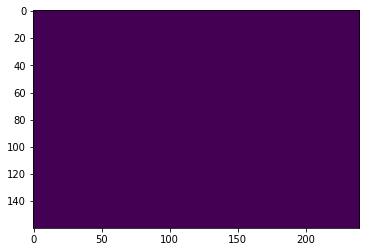

123_1.jpg


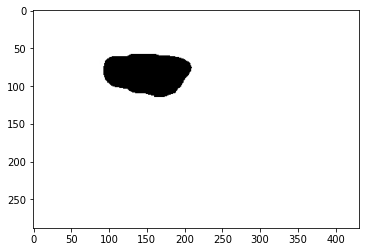

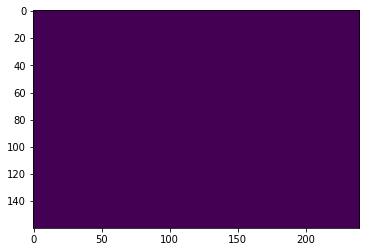

106_3.jpg


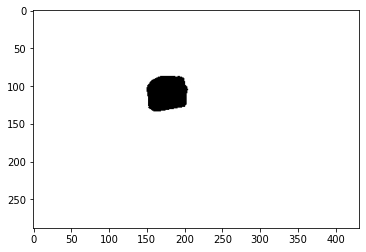

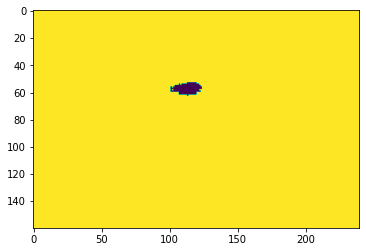

31_1.jpg


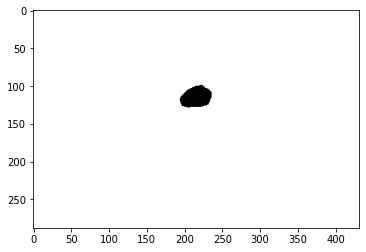

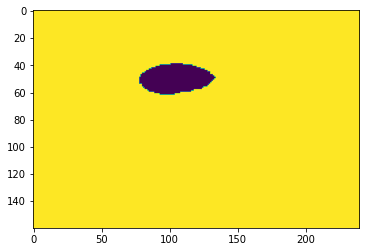

26_1.jpg


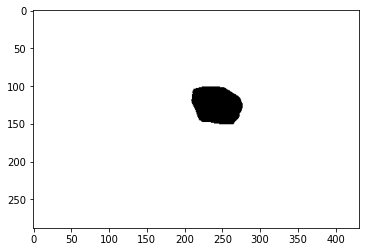

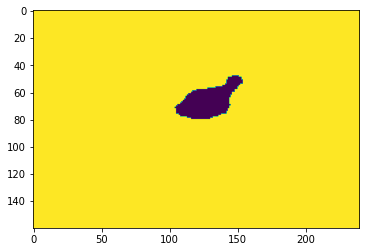

121_1.jpg


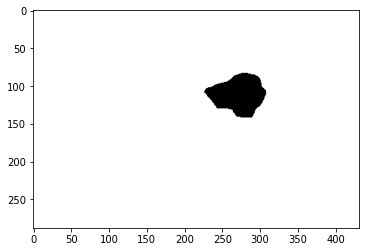

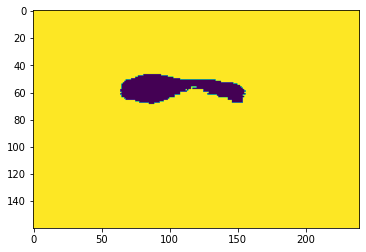

57_1.jpg


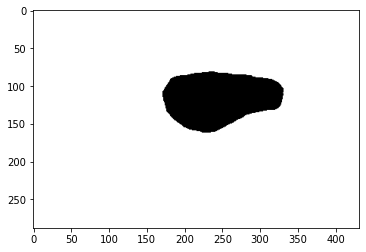

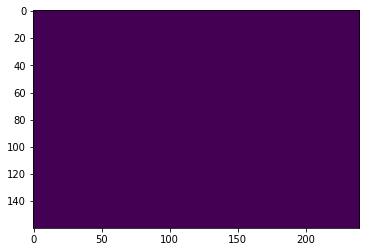

202_1.jpg


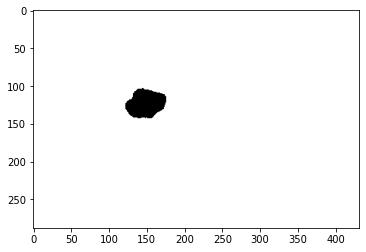

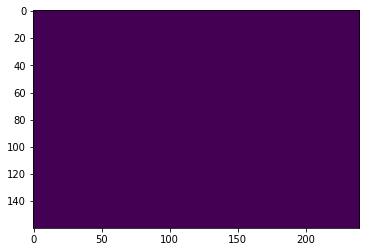

354_1.jpg


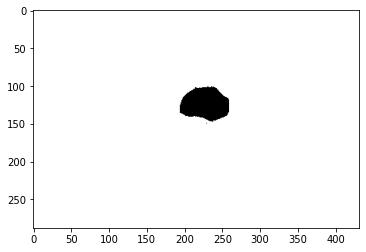

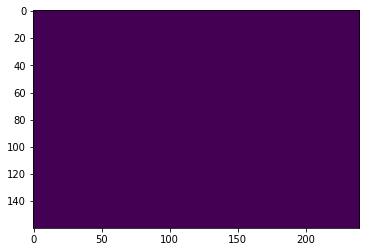

1_2.jpg


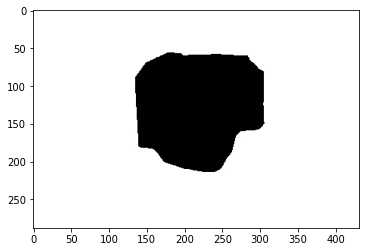

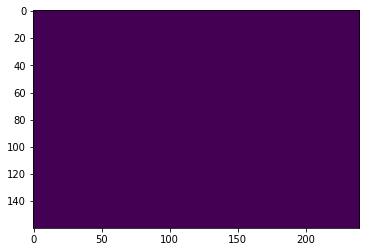

296_5.jpg


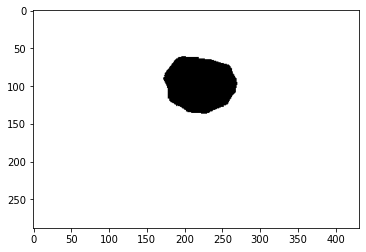

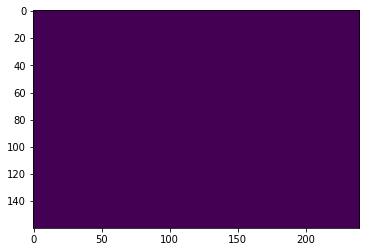

372_1.jpg


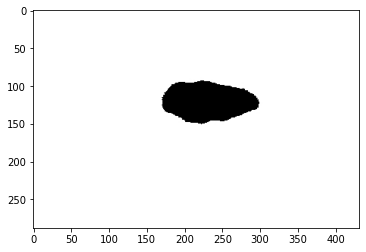

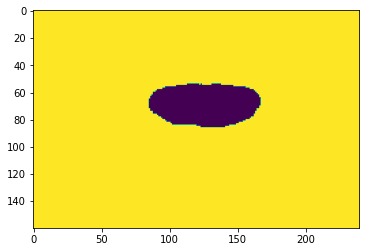

319_1.jpg


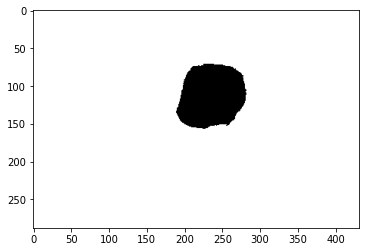

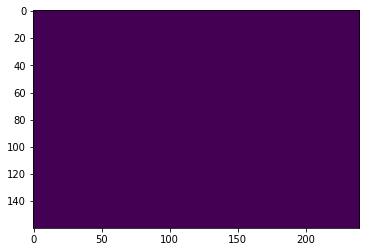

175_1.jpg


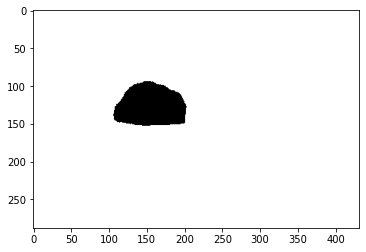

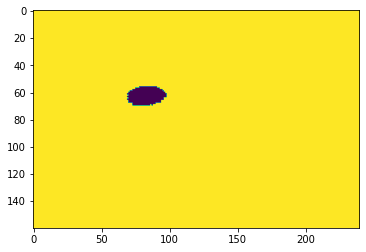

109_1.jpg


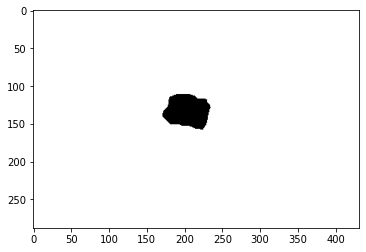

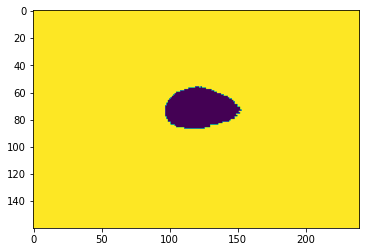

358_1.jpg


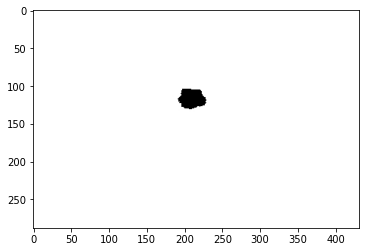

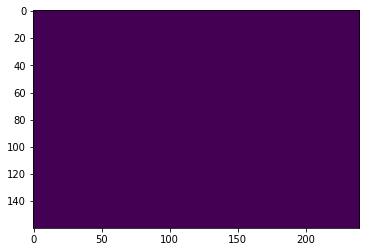

388_1.jpg


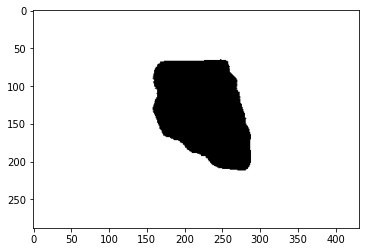

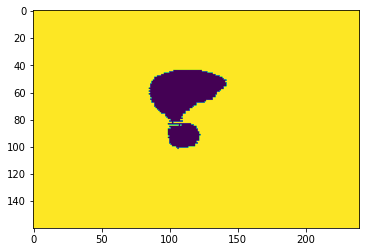

106_1.jpg


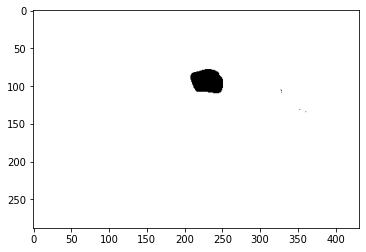

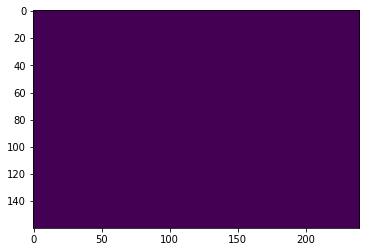

30_1.jpg


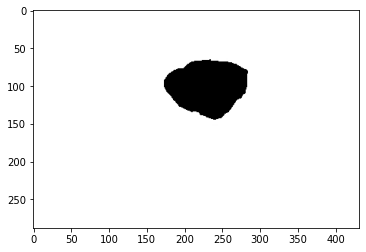

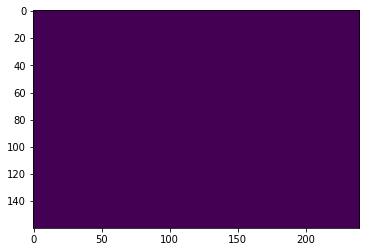

296_1.jpg


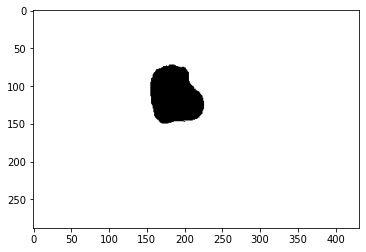

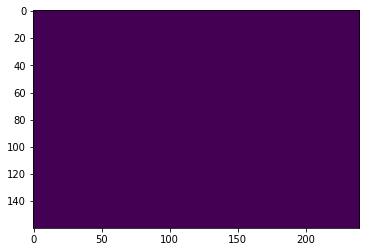

367_1.jpg


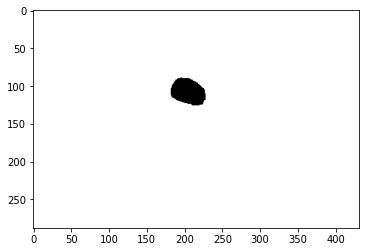

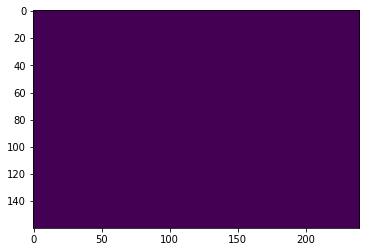

315_1.jpg


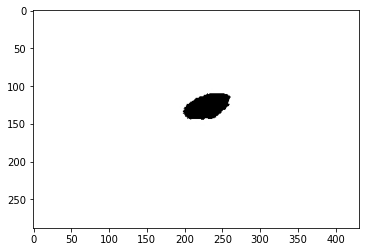

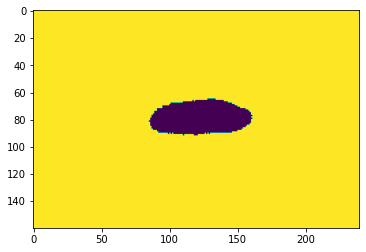

151_1.jpg


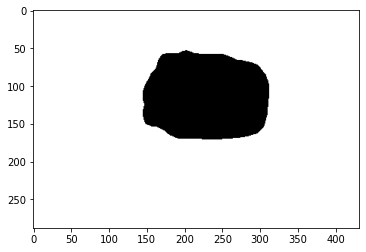

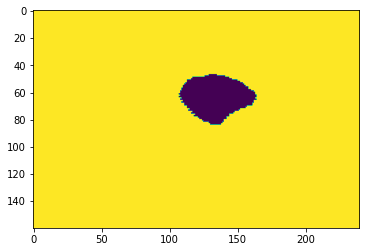

395_2.jpg


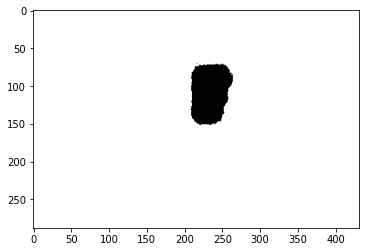

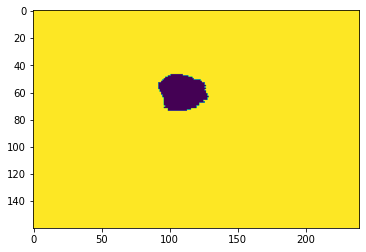

318_1.jpg


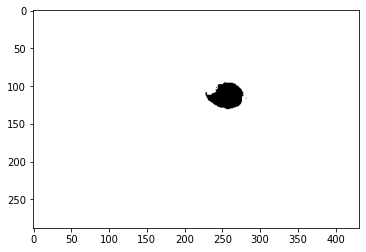

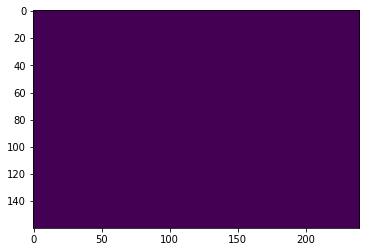

223_1.jpg


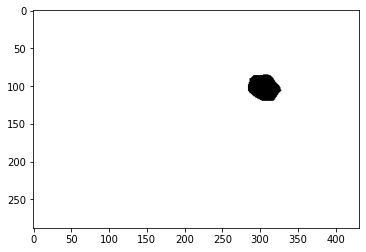

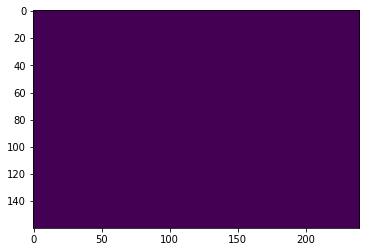

310_1.jpg


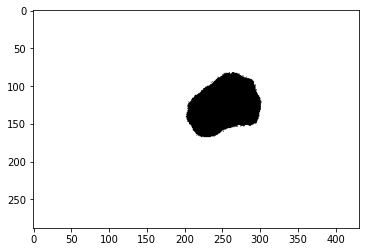

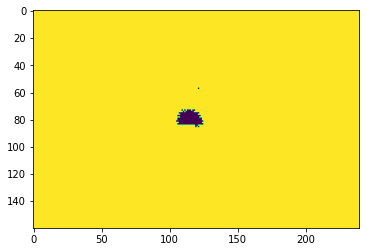

317_2.jpg


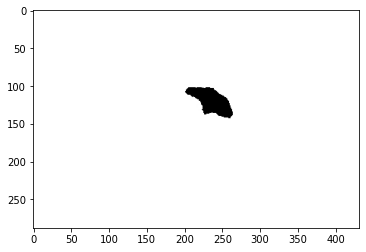

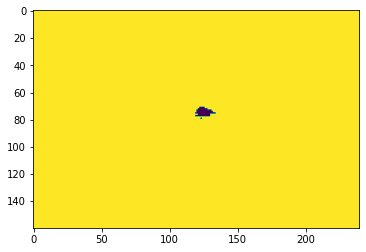

97_2.jpg


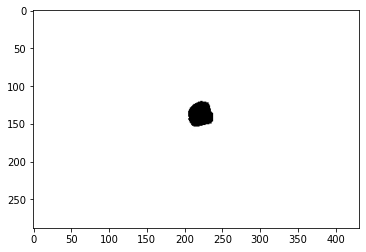

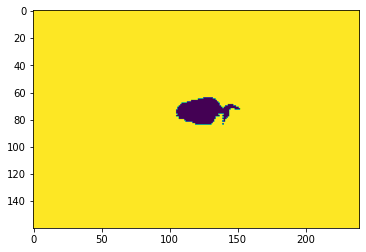

51_1.jpg


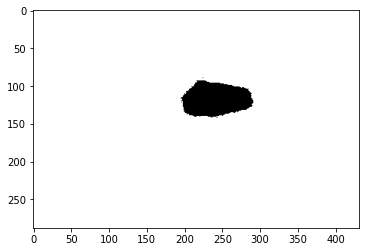

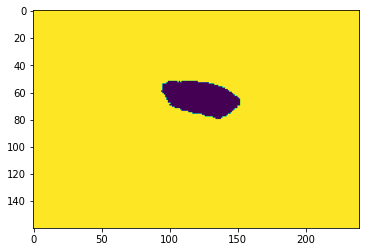

281_1.jpg


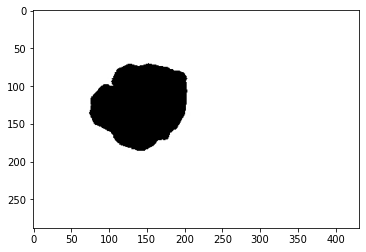

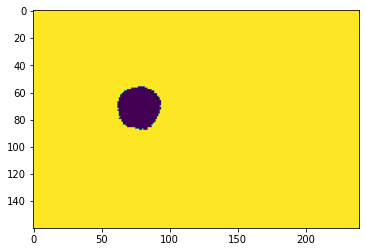

85_1.jpg


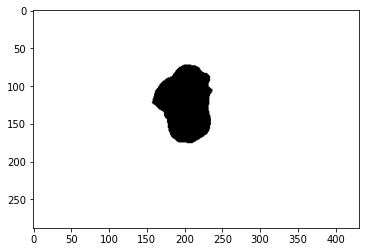

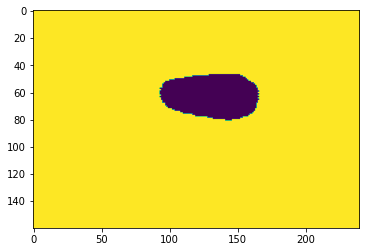

69_1.jpg


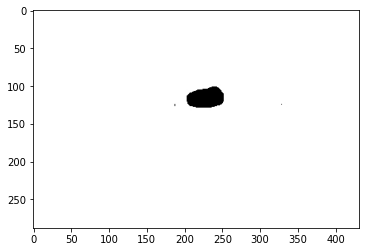

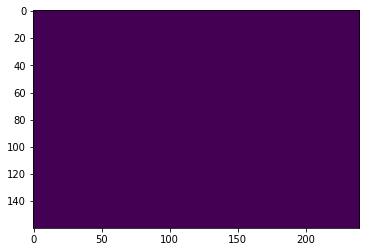

349_1.jpg


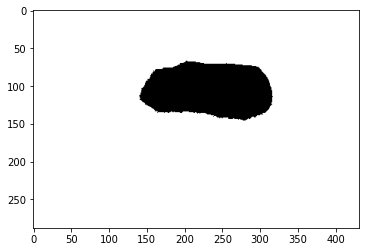

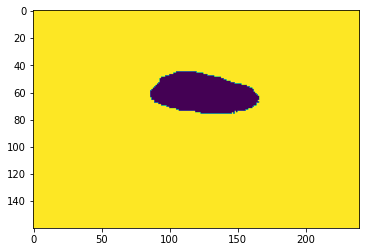

261_1.jpg


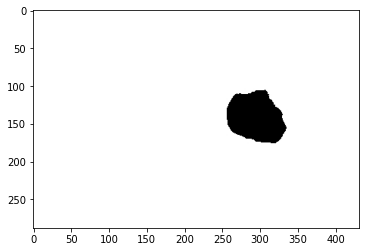

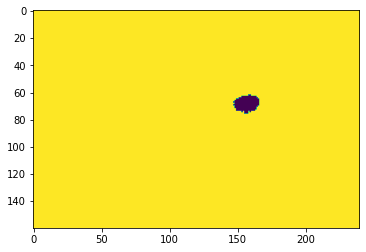

117_1.jpg


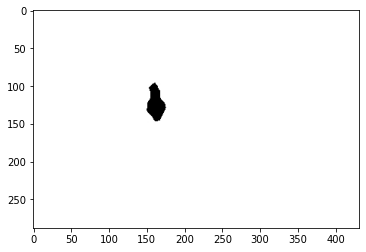

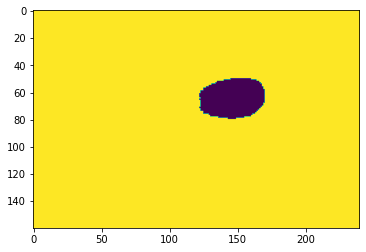

122_2.jpg


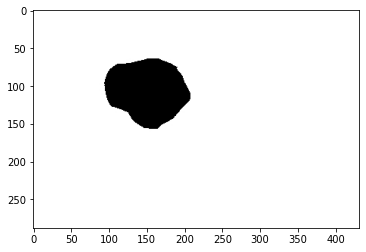

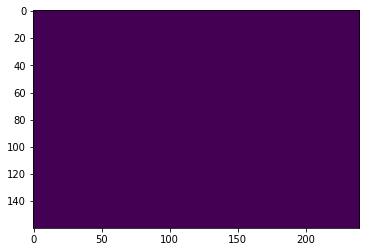

183_1.jpg


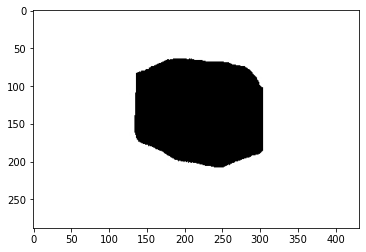

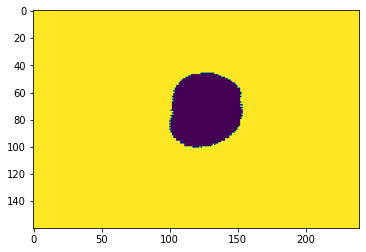

  0%|          | 0/331 [00:00<?, ?it/s]

Got 12010649/12710400 with acc 94.49
Dice score: 321.3506164550781


  0%|          | 0/331 [00:00<?, ?it/s]

Got 12154616/12710400 with acc 95.63
Dice score: 323.4677734375


100%|██████████| 331/331 [00:32<00:00, 10.22it/s, loss=0.152] 


Got 12079750/12710400 with acc 95.04
Dice score: 322.328125
=> Saving checkpoint
Got 3447370/3609600 with acc 95.51
Dice score: 91.7670669555664
LENGTH OF LOADER =  94
TYPE OF LOADER =  <class 'torch.utils.data.dataloader.DataLoader'>
92_1.jpg


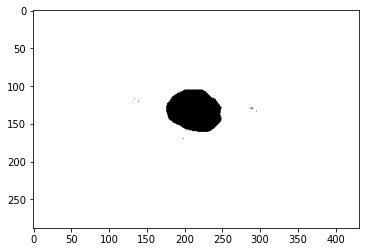

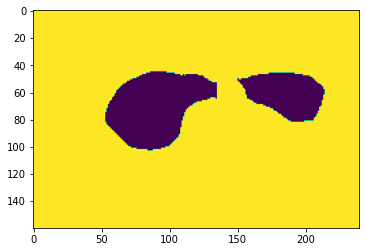

93_2.jpg


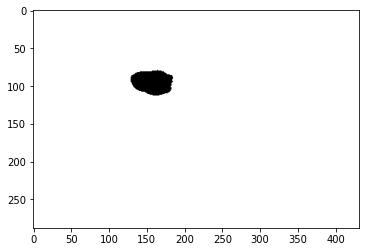

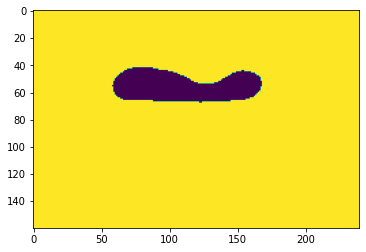

271_1.jpg


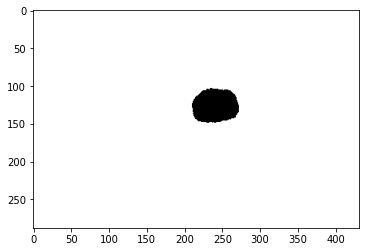

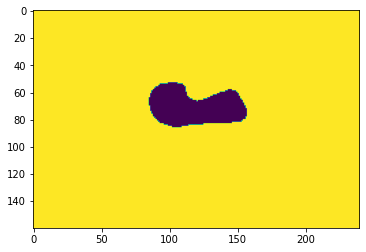

177_2.jpg


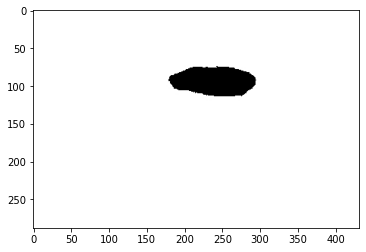

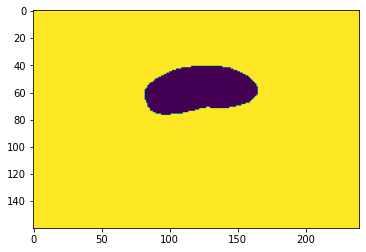

283_1.jpg


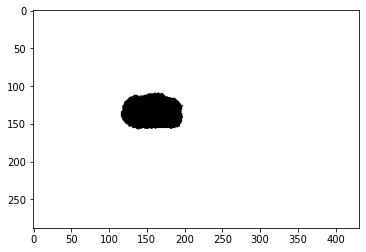

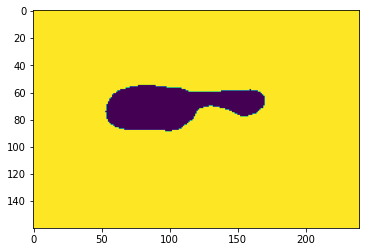

9_1.jpg


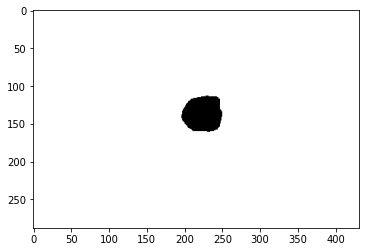

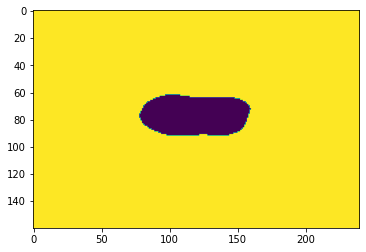

45_1.jpg


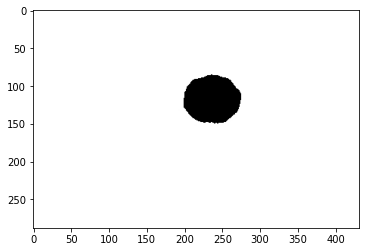

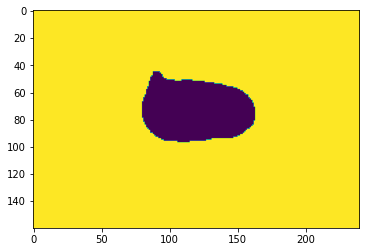

140_1.jpg


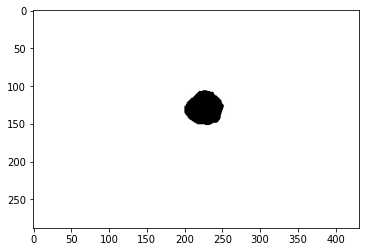

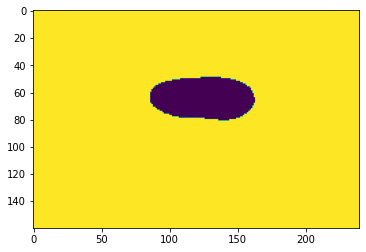

346_1.jpg


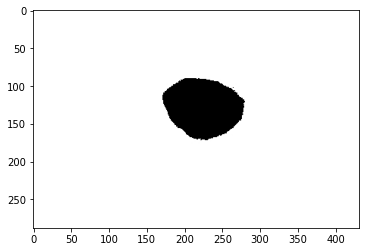

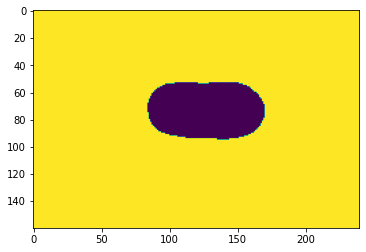

391_1.jpg


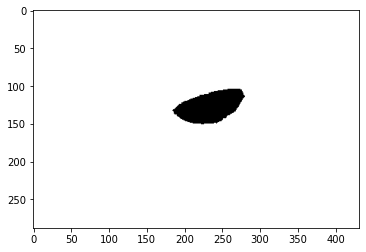

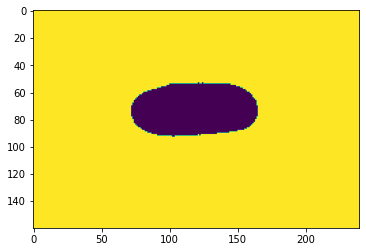

61_1.jpg


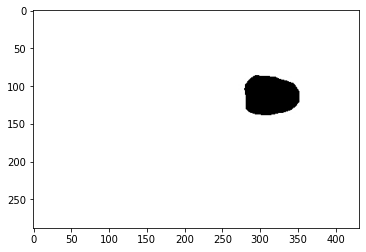

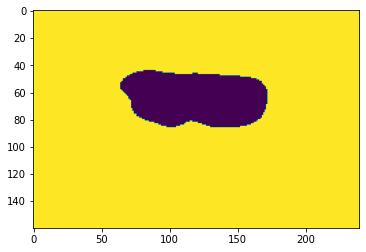

62_1.jpg


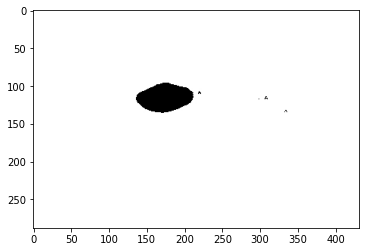

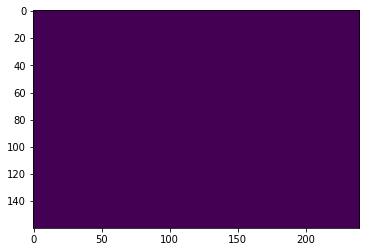

158_2.jpg


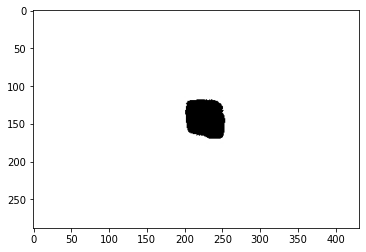

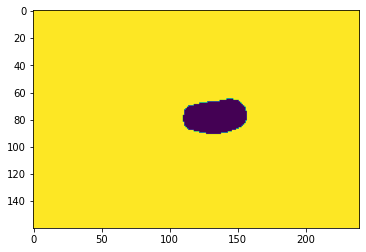

319_2.jpg


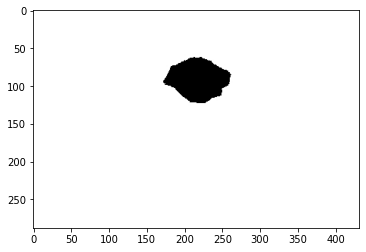

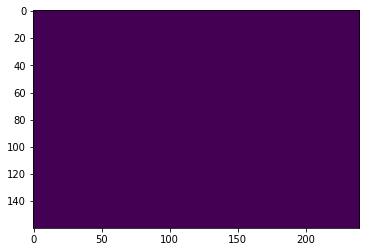

222_1.jpg


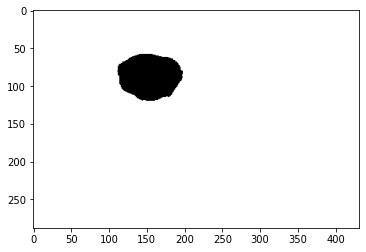

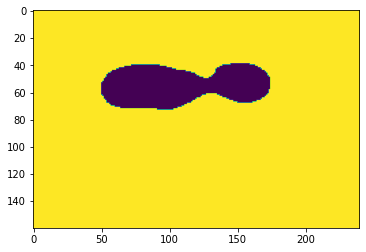

334_2.jpg


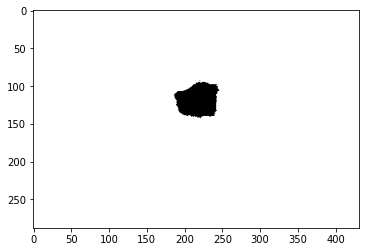

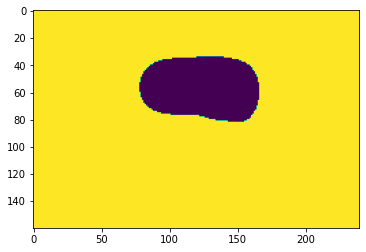

119_1.jpg


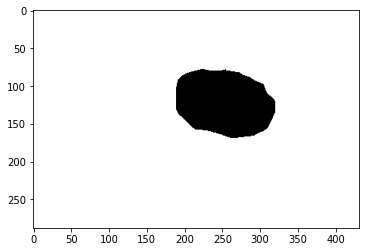

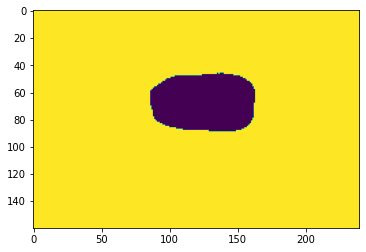

125_1.jpg


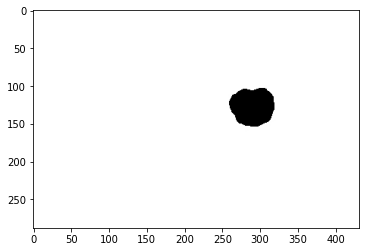

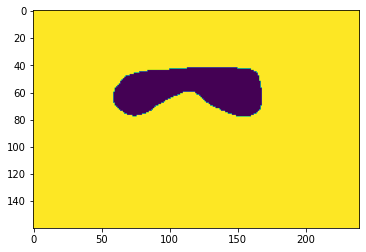

35_1.jpg


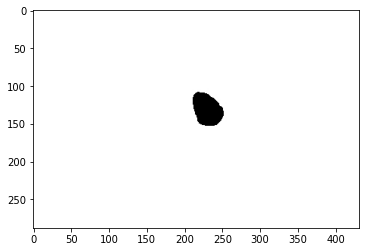

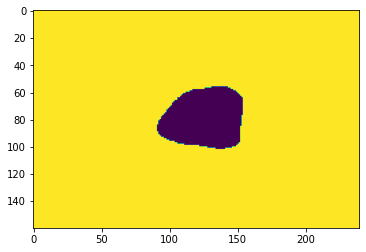

132_1.jpg


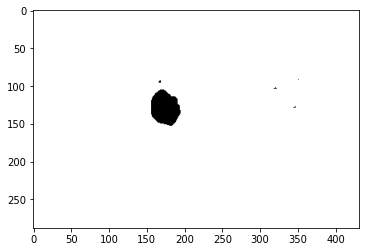

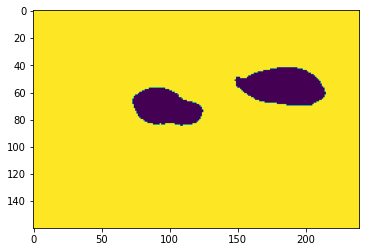

75_2.jpg


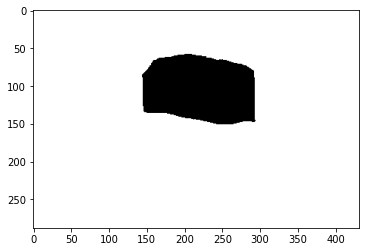

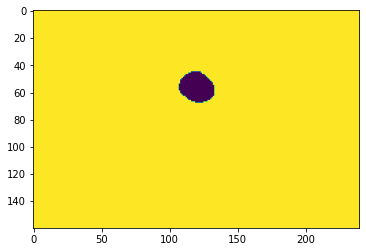

378_1.jpg


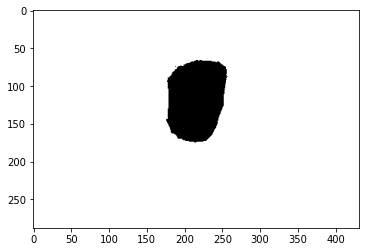

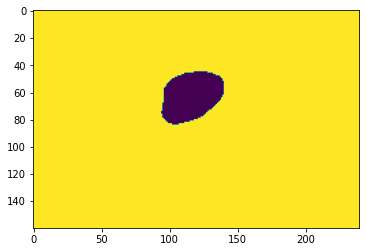

189_2.jpg


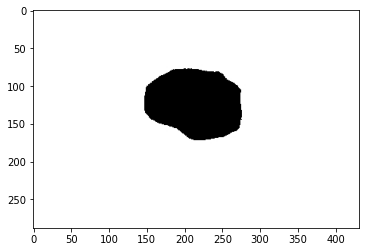

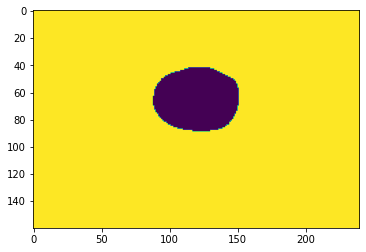

345_1.jpg


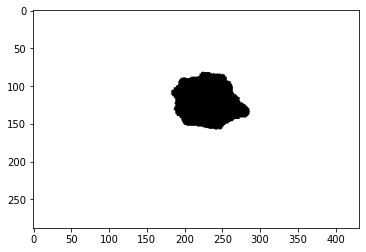

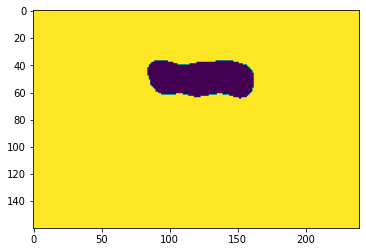

62_3.jpg


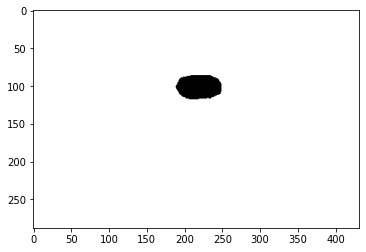

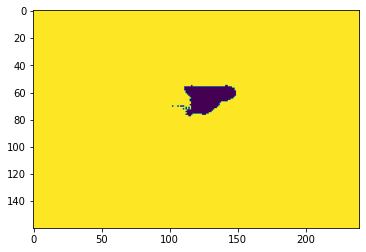

15_1.jpg


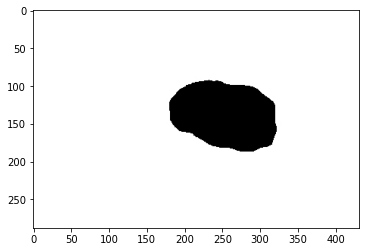

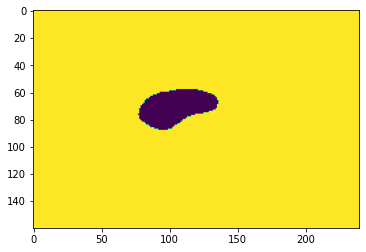

12_1.jpg


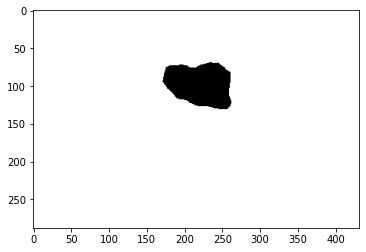

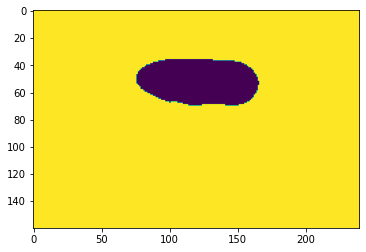

176_1.jpg


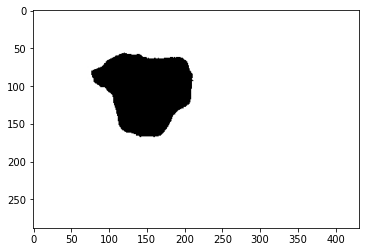

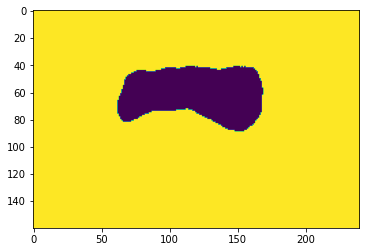

341_1.jpg


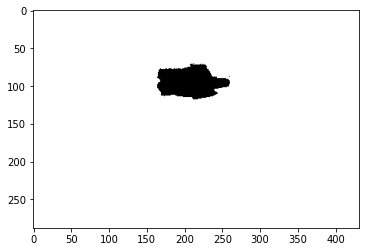

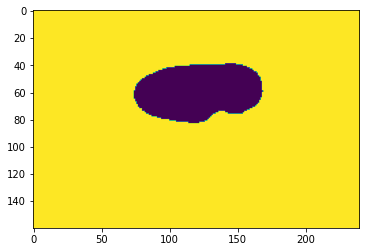

73_1.jpg


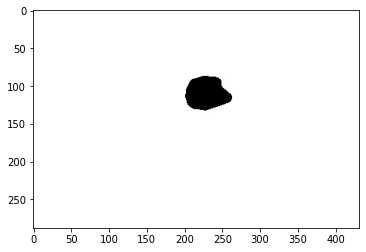

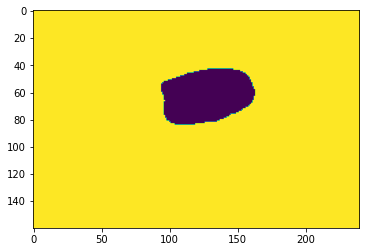

343_1.jpg


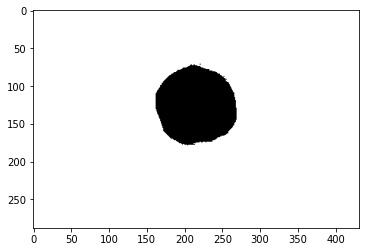

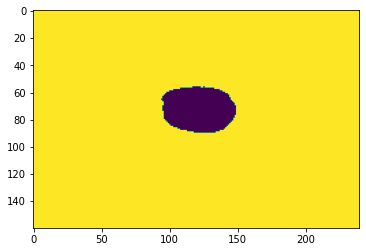

32_1.jpg


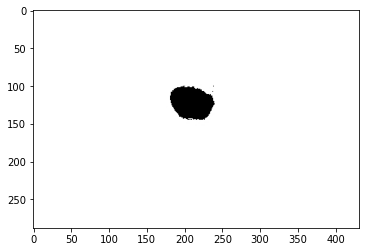

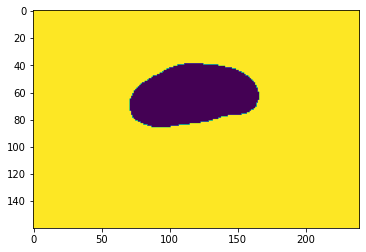

210_2.jpg


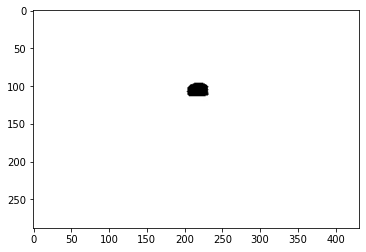

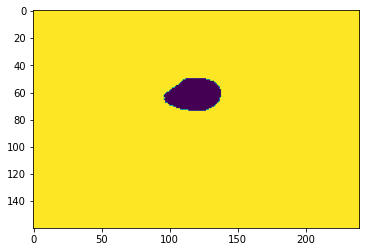

308_1.jpg


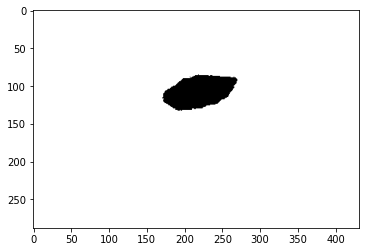

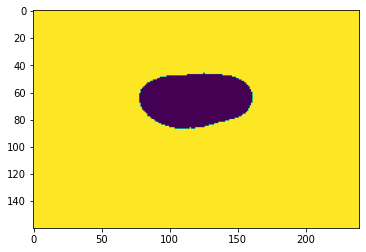

276_1.jpg


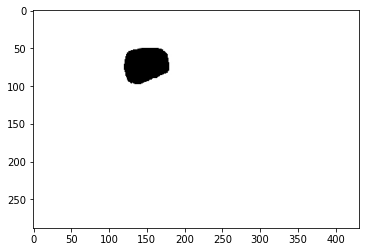

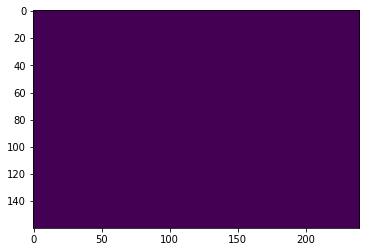

74_1.jpg


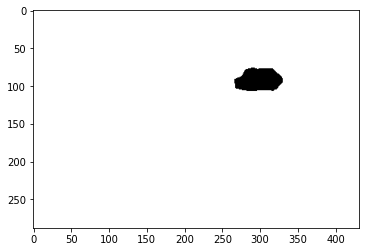

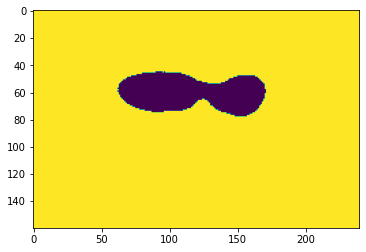

332_1.jpg


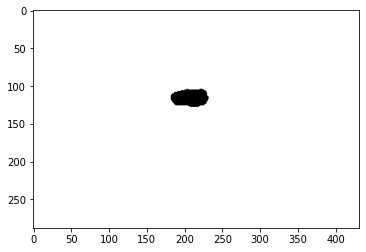

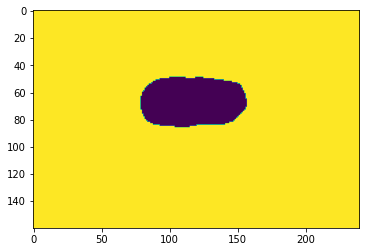

55_1.jpg


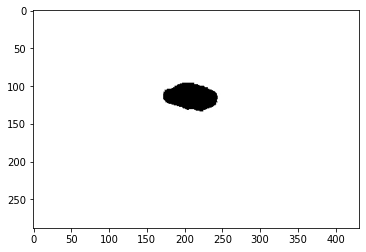

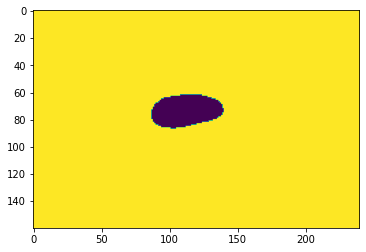

50_1.jpg


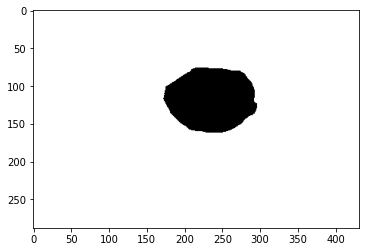

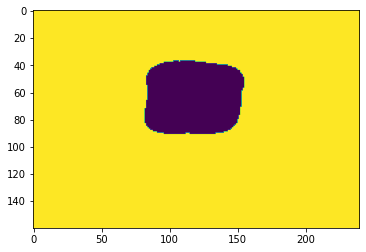

353_1.jpg


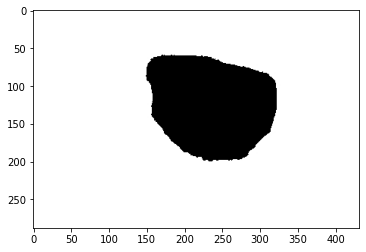

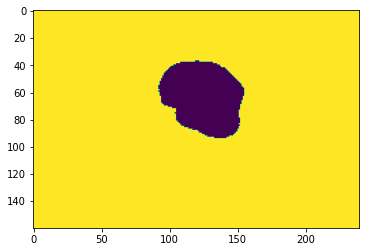

170_1.jpg


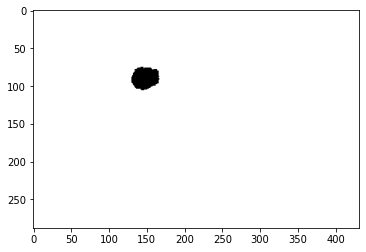

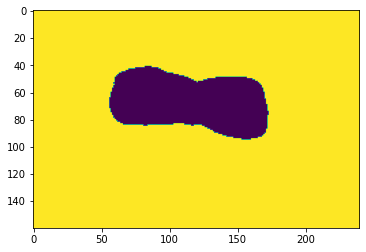

129_1.jpg


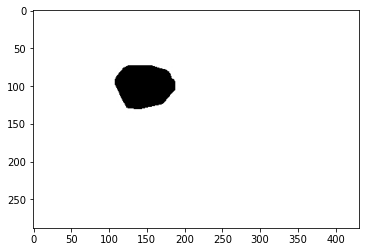

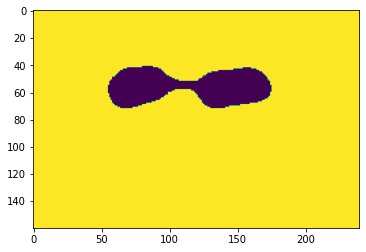

315_2.jpg


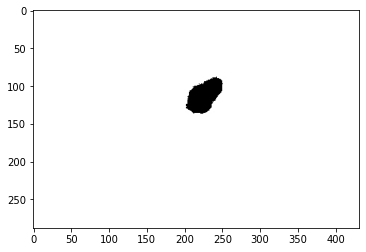

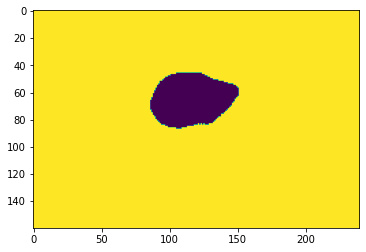

203_1.jpg


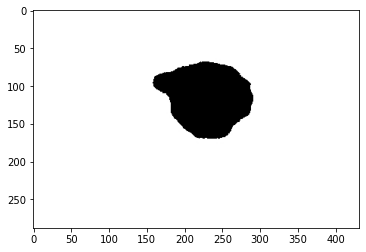

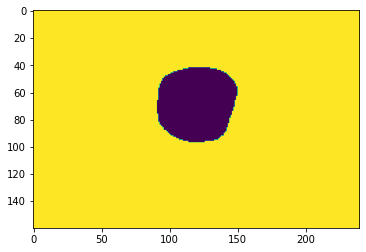

211_1.jpg


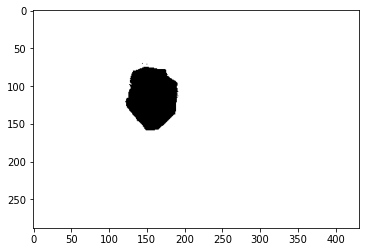

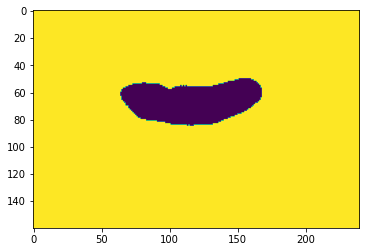

399_1.jpg


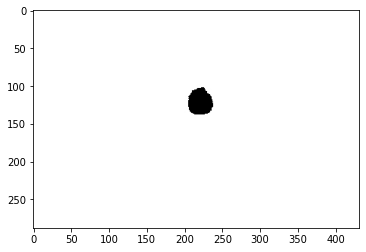

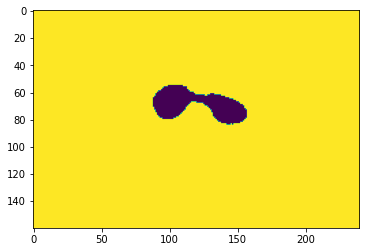

172_1.jpg


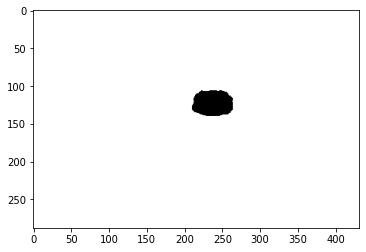

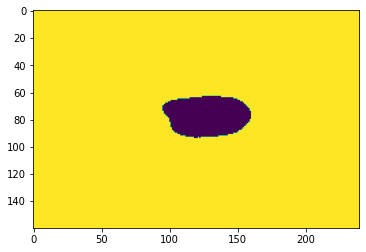

368_1.jpg


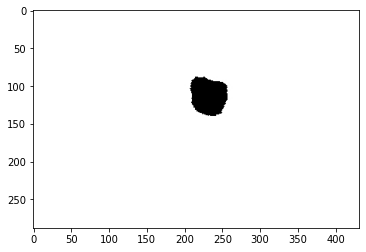

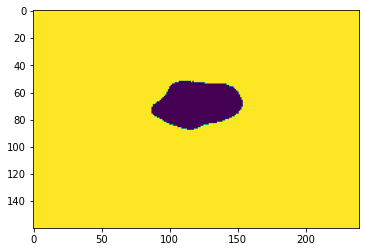

234_2.jpg


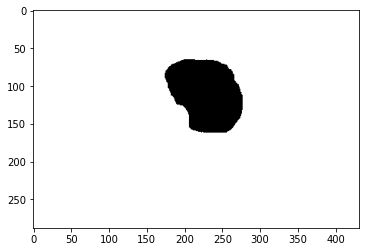

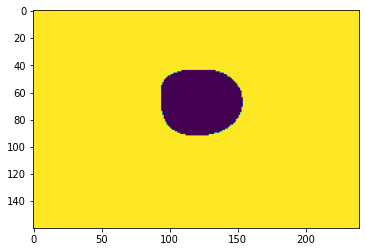

284_1.jpg


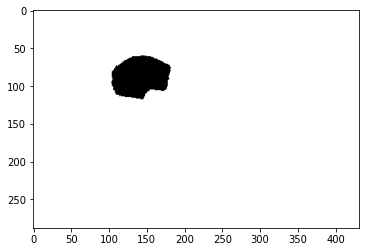

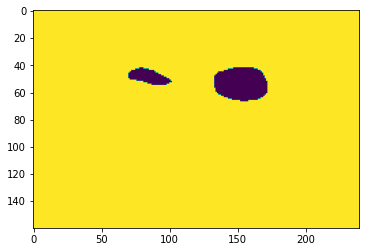

272_1.jpg


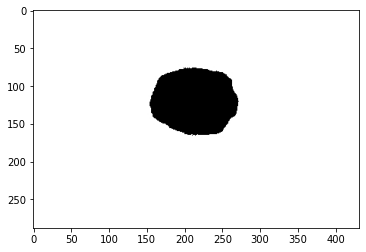

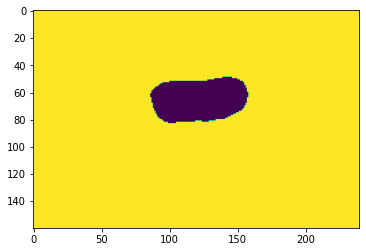

19_1.jpg


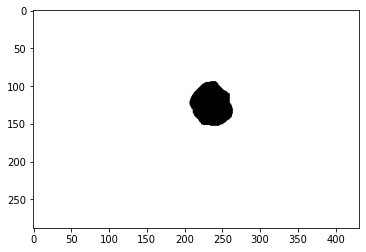

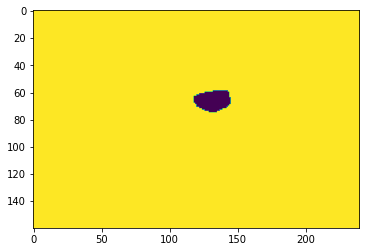

286_1.jpg


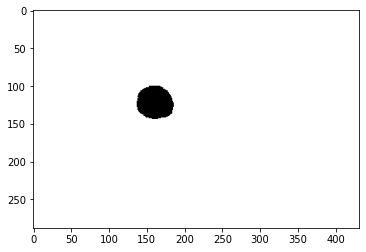

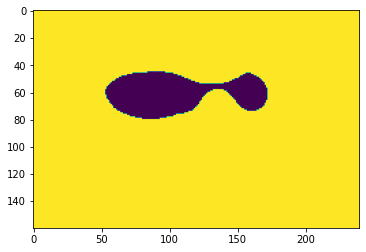

118_1.jpg


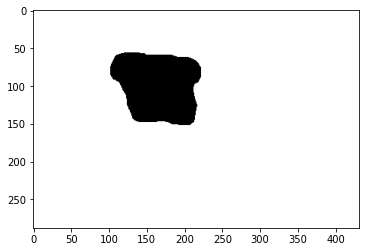

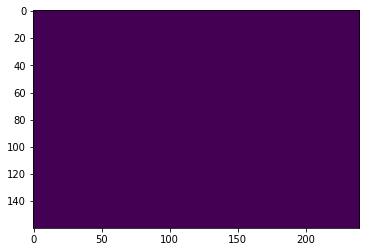

95_1.jpg


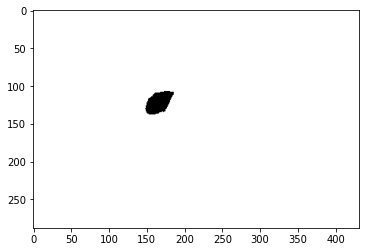

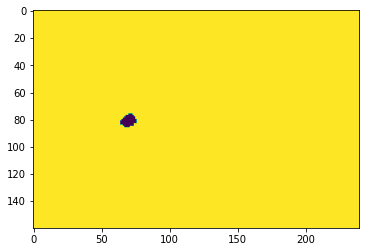

342_1.jpg


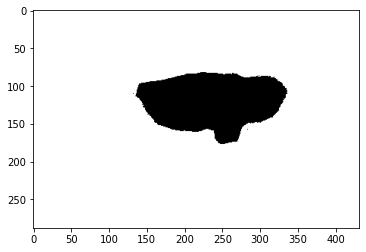

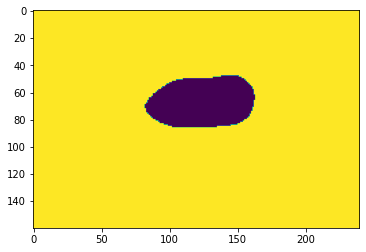

80_2.jpg


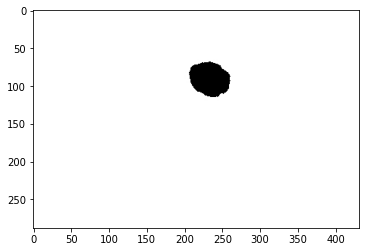

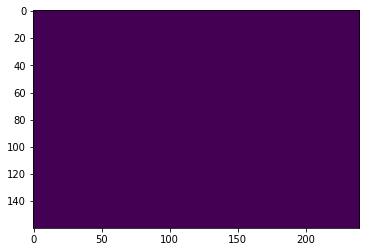

123_1.jpg


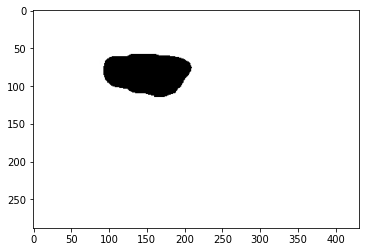

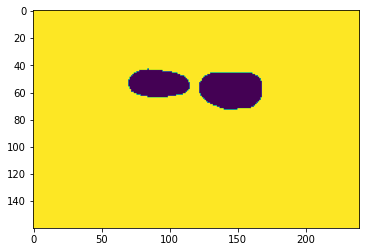

106_3.jpg


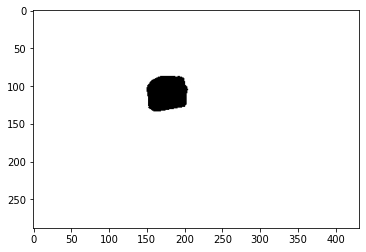

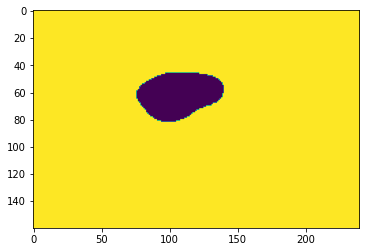

31_1.jpg


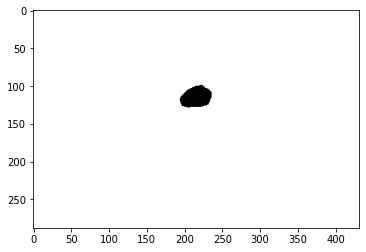

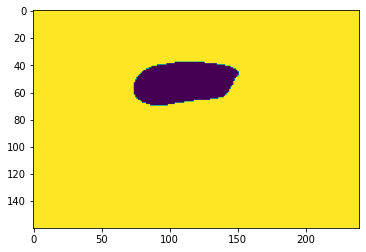

26_1.jpg


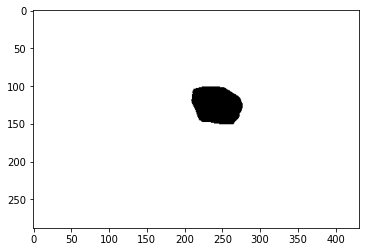

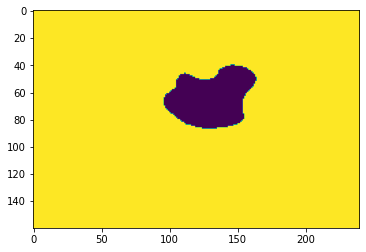

121_1.jpg


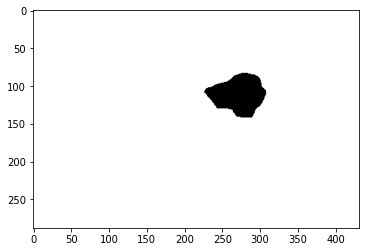

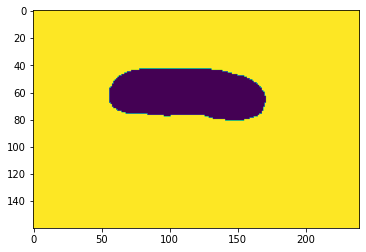

57_1.jpg


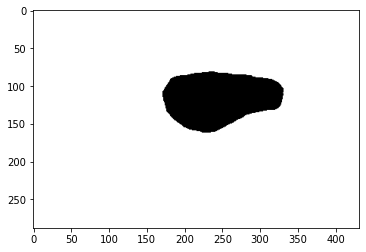

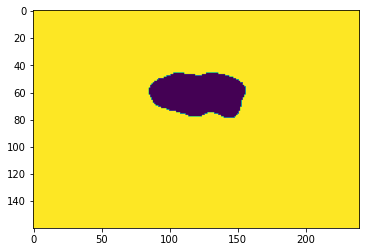

202_1.jpg


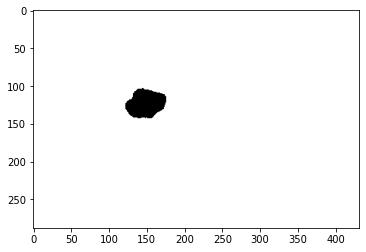

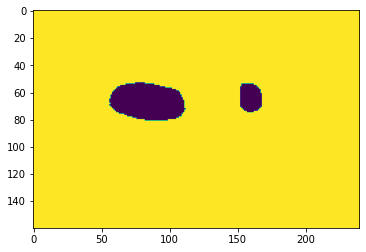

354_1.jpg


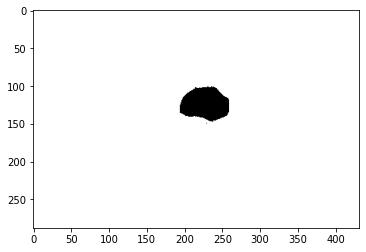

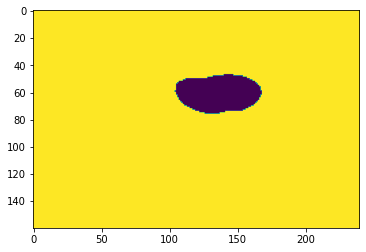

1_2.jpg


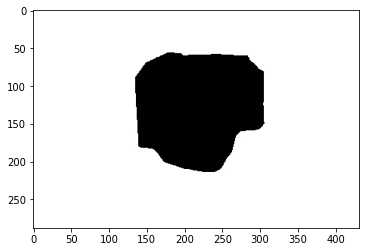

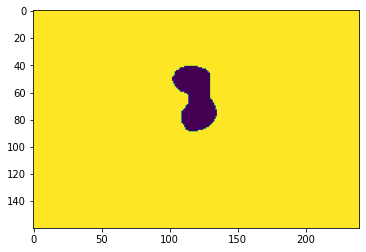

296_5.jpg


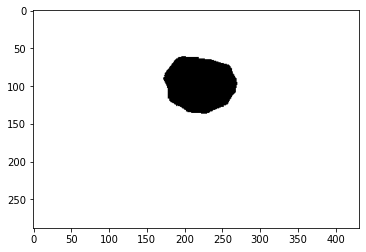

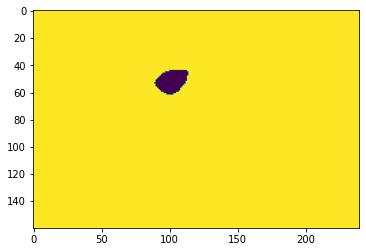

372_1.jpg


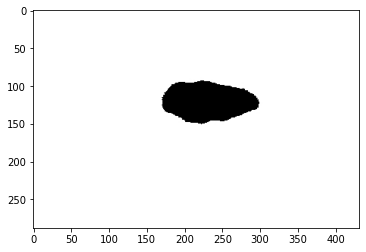

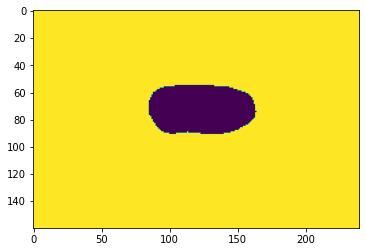

319_1.jpg


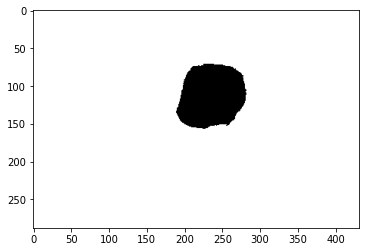

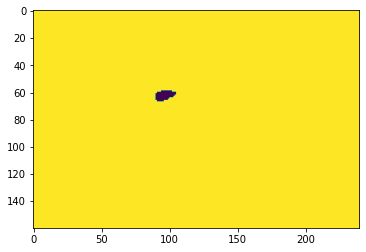

175_1.jpg


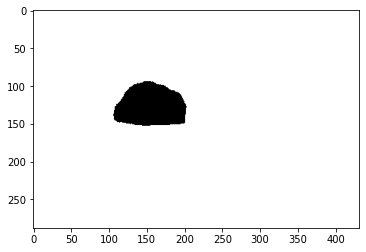

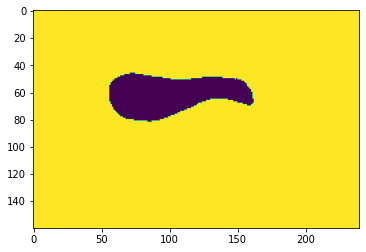

109_1.jpg


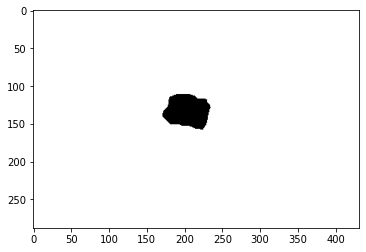

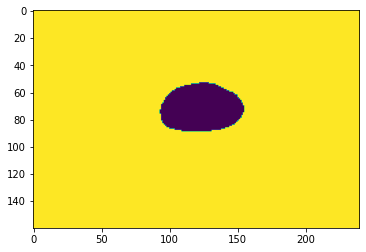

358_1.jpg


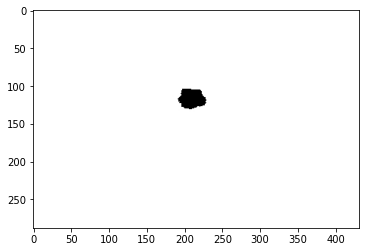

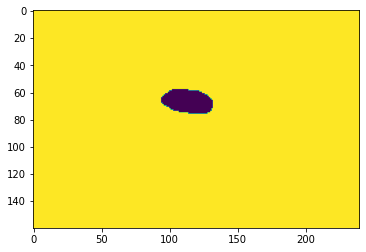

388_1.jpg


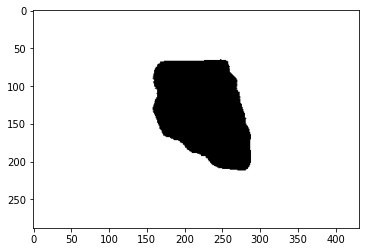

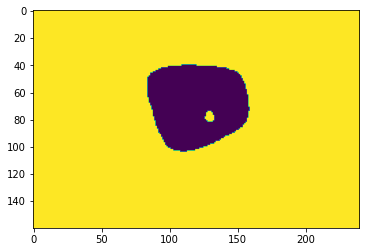

106_1.jpg


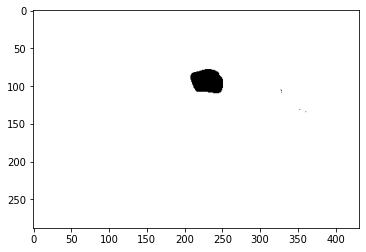

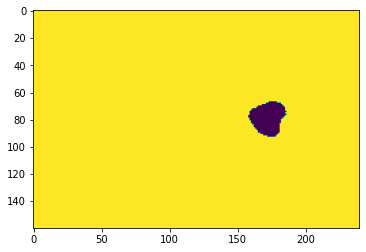

30_1.jpg


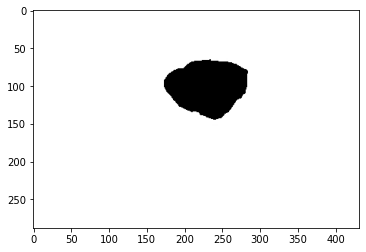

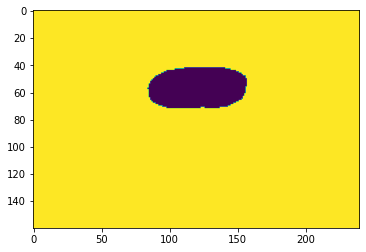

296_1.jpg


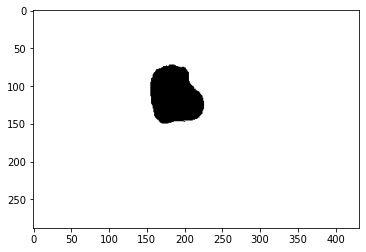

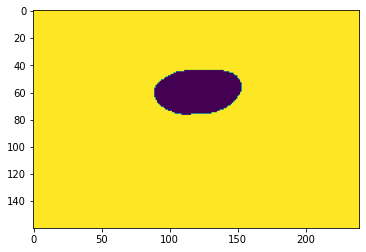

367_1.jpg


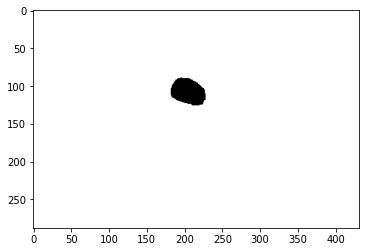

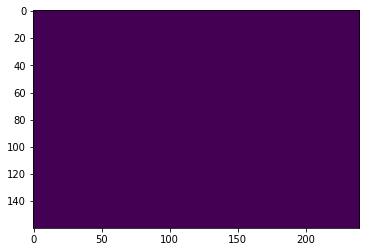

315_1.jpg


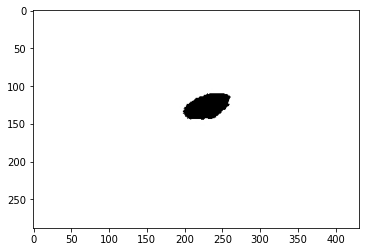

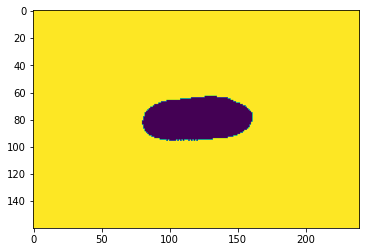

151_1.jpg


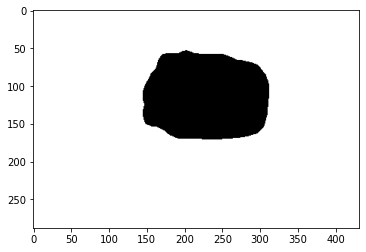

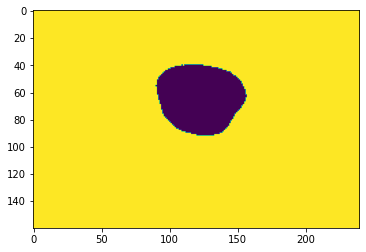

395_2.jpg


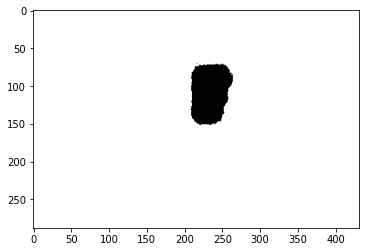

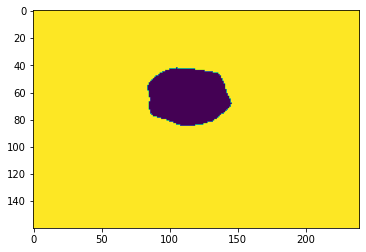

318_1.jpg


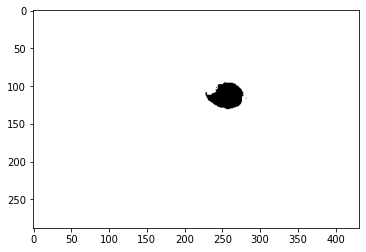

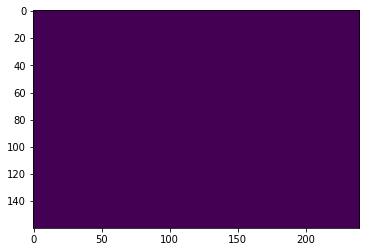

223_1.jpg


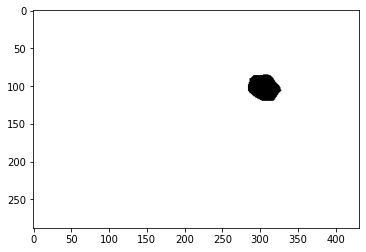

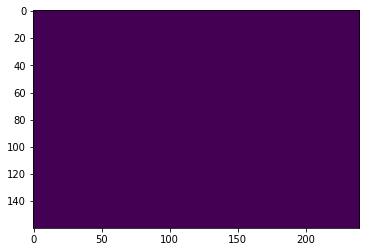

310_1.jpg


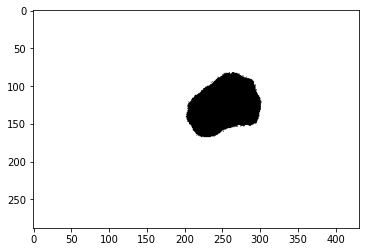

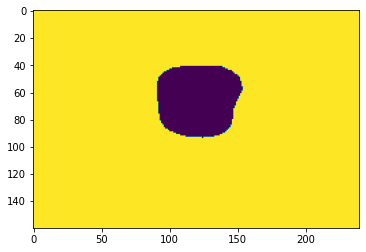

317_2.jpg


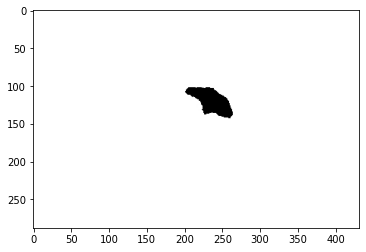

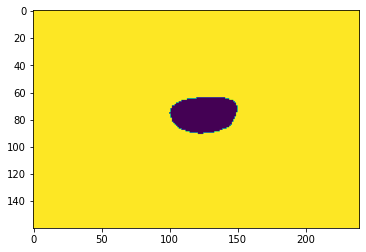

97_2.jpg


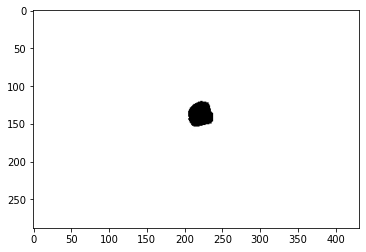

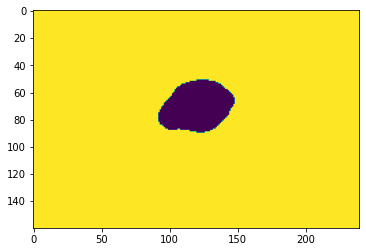

51_1.jpg


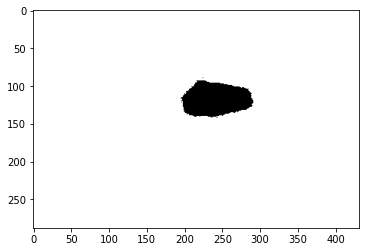

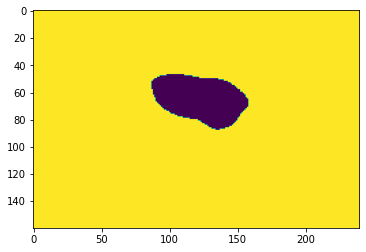

281_1.jpg


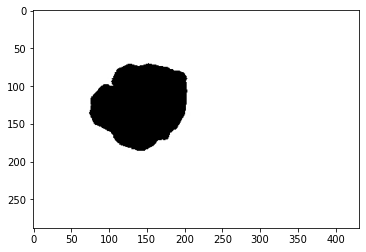

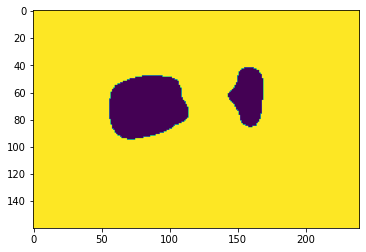

85_1.jpg


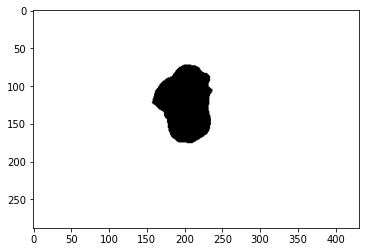

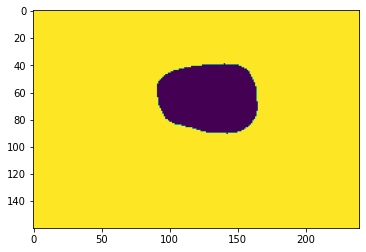

69_1.jpg


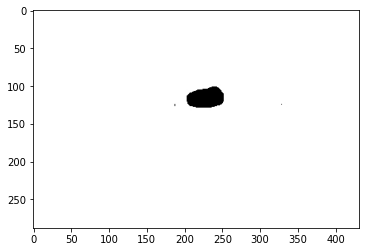

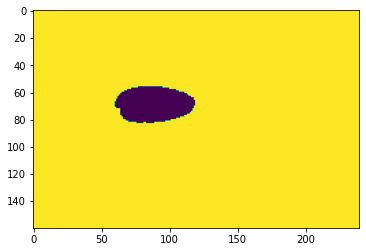

349_1.jpg


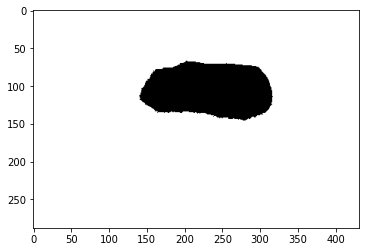

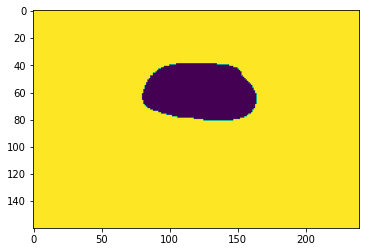

261_1.jpg


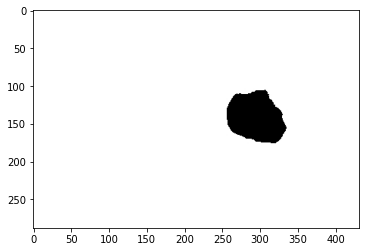

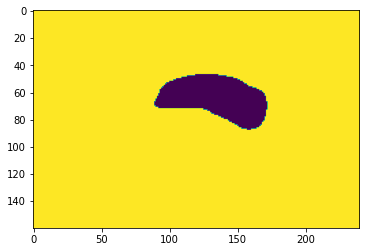

117_1.jpg


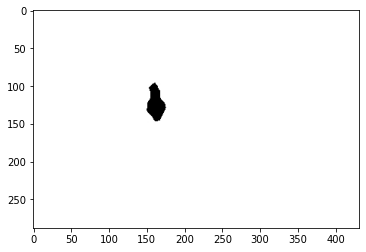

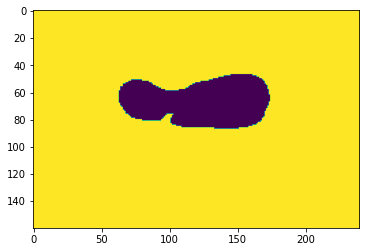

122_2.jpg


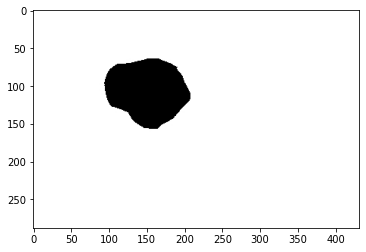

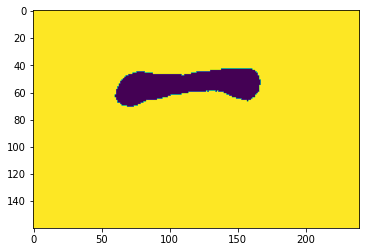

183_1.jpg


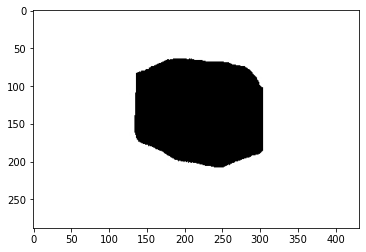

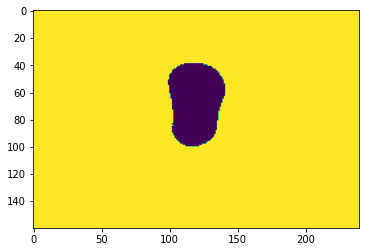

  0%|          | 0/331 [00:00<?, ?it/s]

Got 12088273/12710400 with acc 95.11
Dice score: 322.42315673828125


  0%|          | 0/331 [00:00<?, ?it/s]

Got 12189098/12710400 with acc 95.90
Dice score: 323.8988952636719


100%|██████████| 331/331 [00:32<00:00, 10.06it/s, loss=0.0948]


Got 12147995/12710400 with acc 95.58
Dice score: 323.40301513671875
=> Saving checkpoint
Got 3472866/3609600 with acc 96.21
Dice score: 92.15172576904297
LENGTH OF LOADER =  94
TYPE OF LOADER =  <class 'torch.utils.data.dataloader.DataLoader'>
92_1.jpg


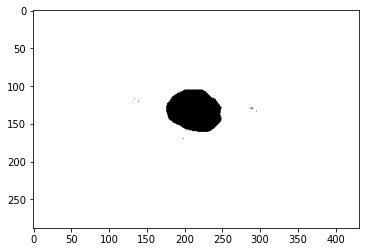

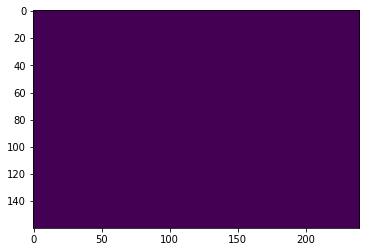

93_2.jpg


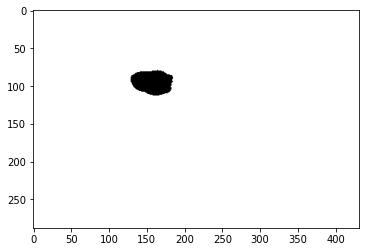

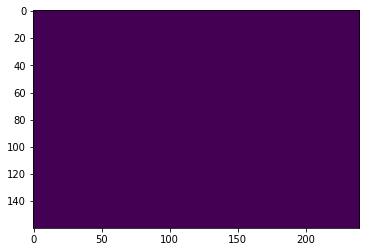

271_1.jpg


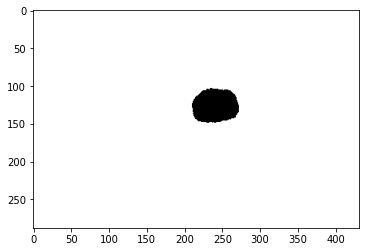

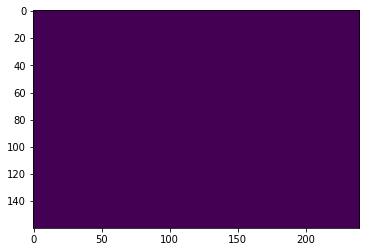

177_2.jpg


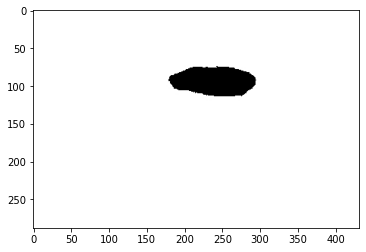

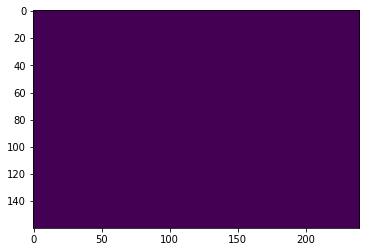

283_1.jpg


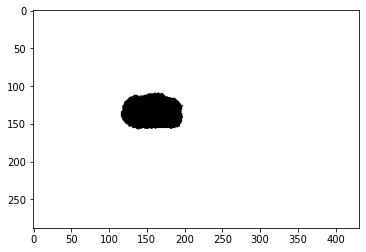

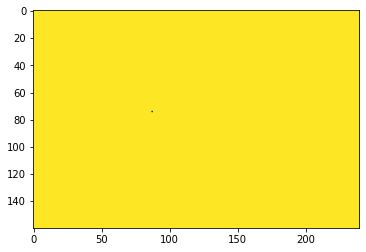

9_1.jpg


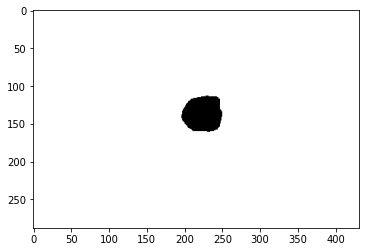

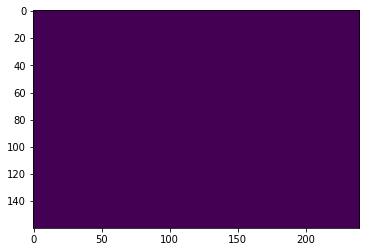

45_1.jpg


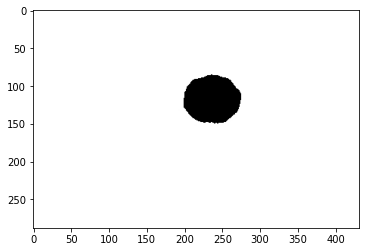

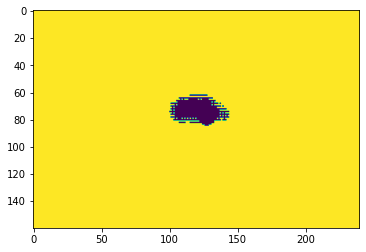

140_1.jpg


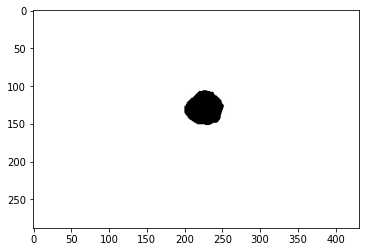

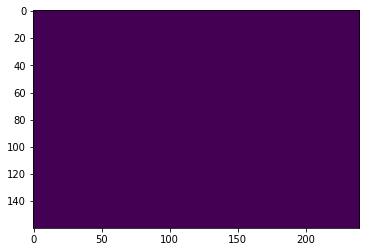

346_1.jpg


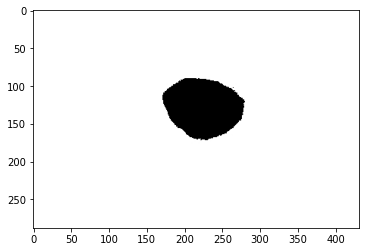

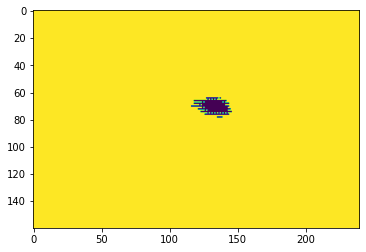

391_1.jpg


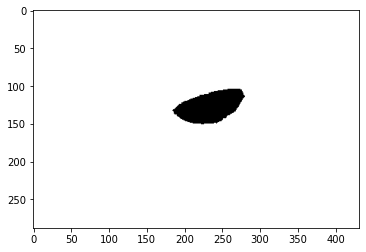

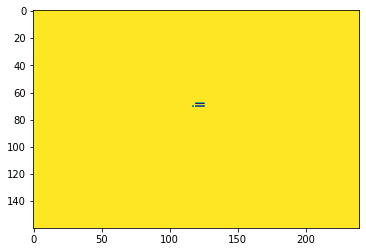

61_1.jpg


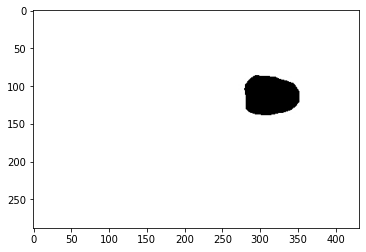

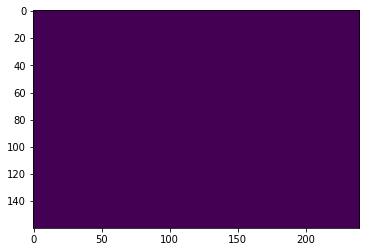

62_1.jpg


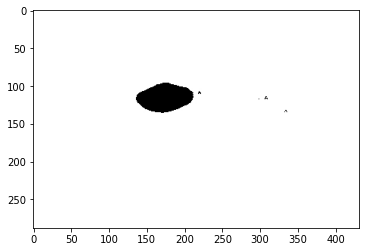

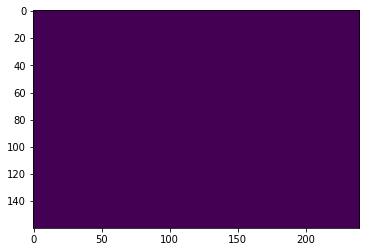

158_2.jpg


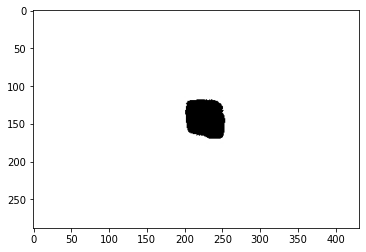

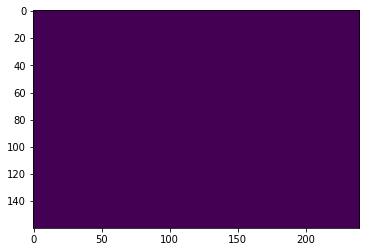

319_2.jpg


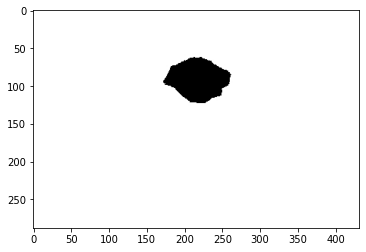

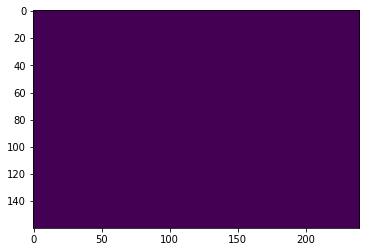

222_1.jpg


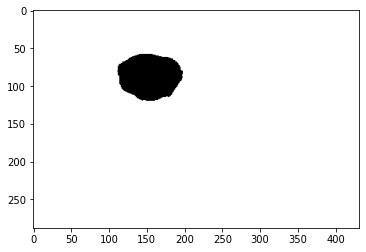

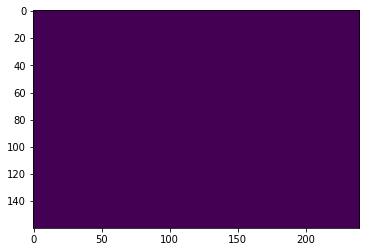

334_2.jpg


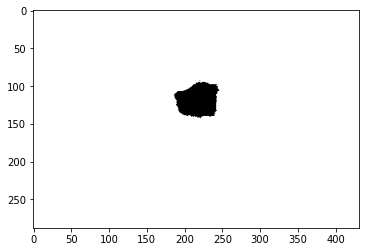

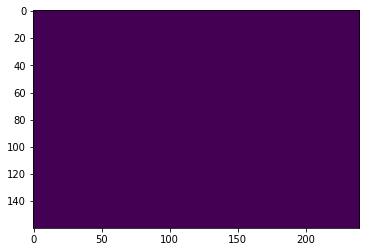

119_1.jpg


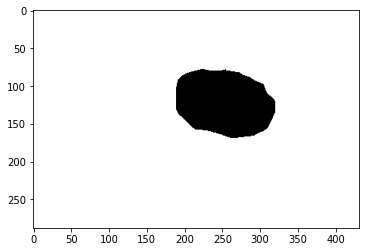

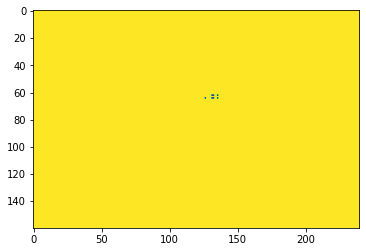

125_1.jpg


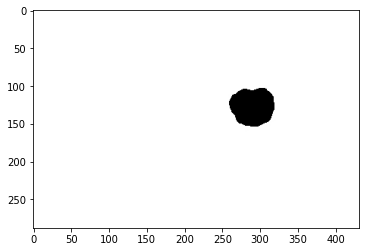

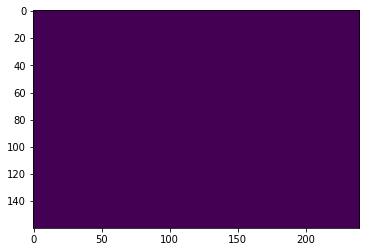

35_1.jpg


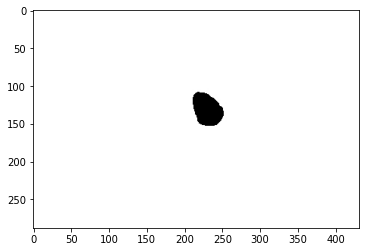

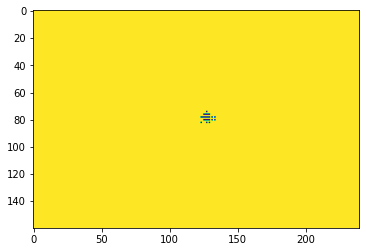

132_1.jpg


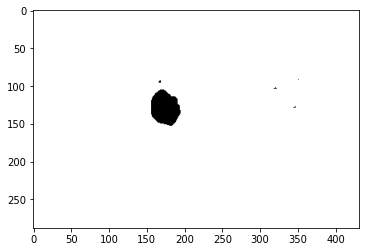

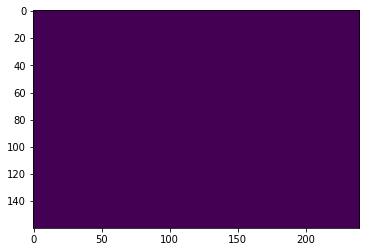

75_2.jpg


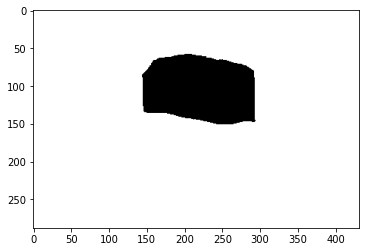

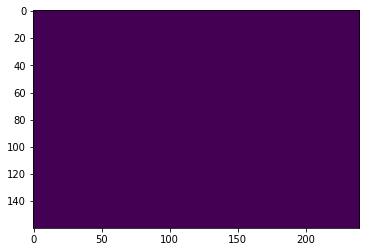

378_1.jpg


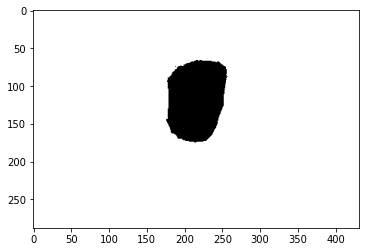

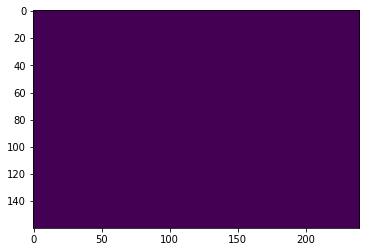

189_2.jpg


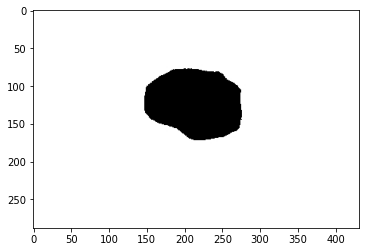

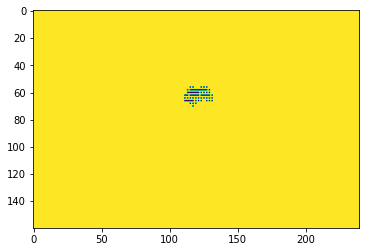

345_1.jpg


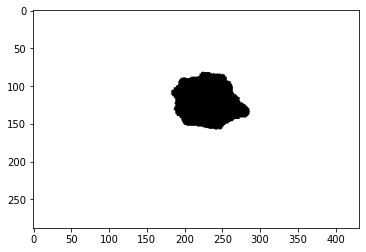

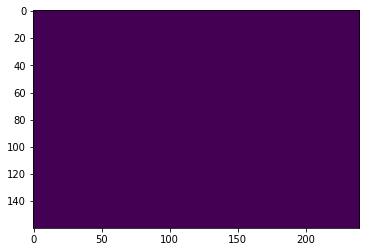

62_3.jpg


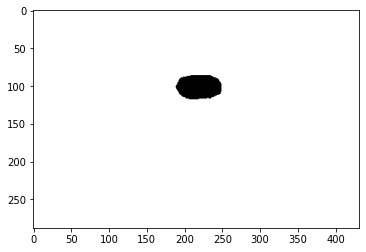

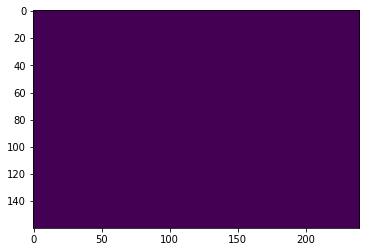

15_1.jpg


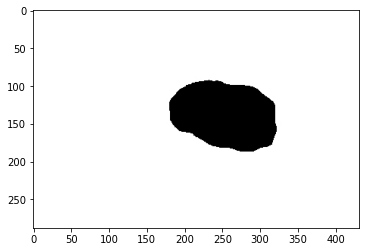

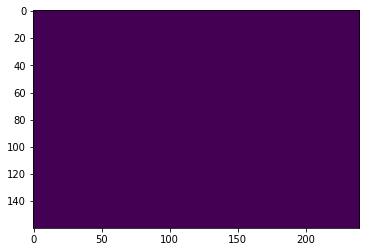

12_1.jpg


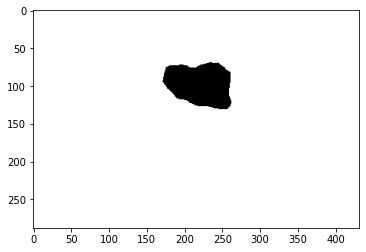

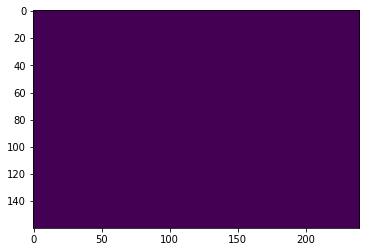

176_1.jpg


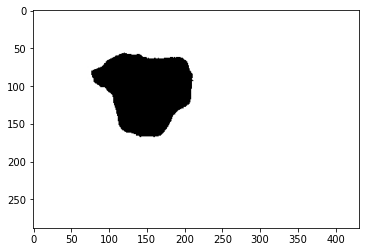

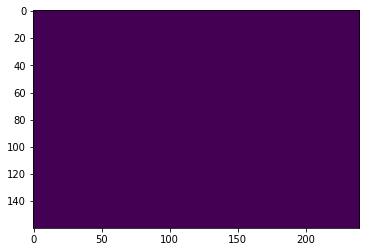

341_1.jpg


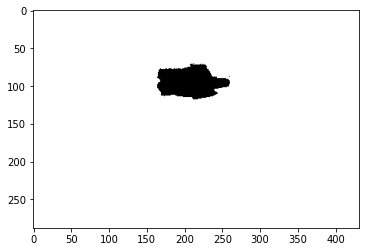

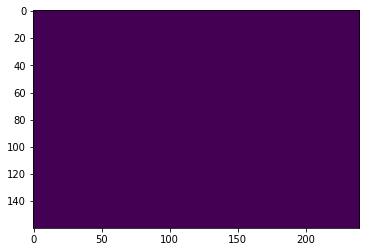

73_1.jpg


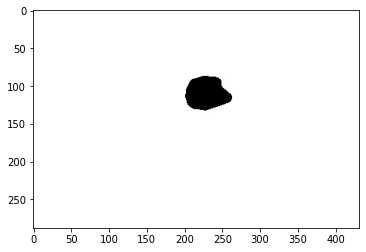

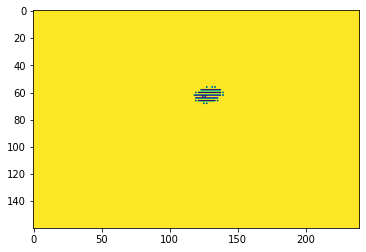

343_1.jpg


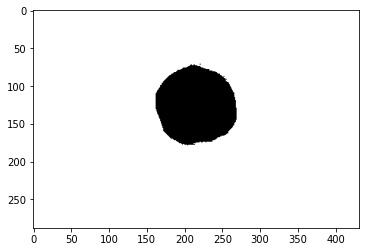

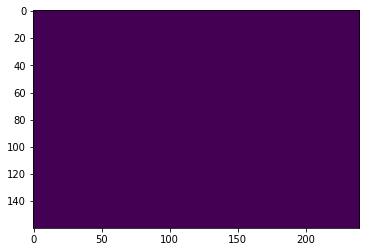

32_1.jpg


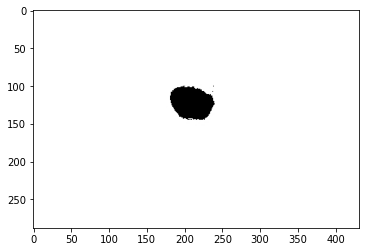

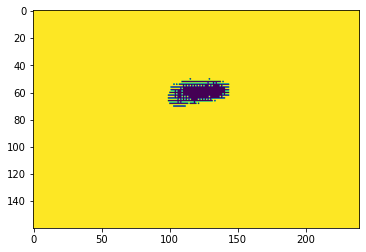

210_2.jpg


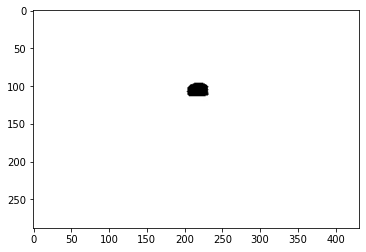

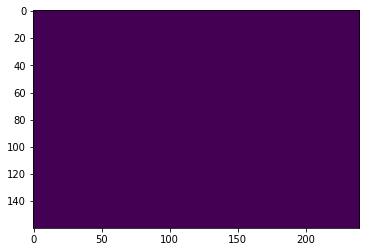

308_1.jpg


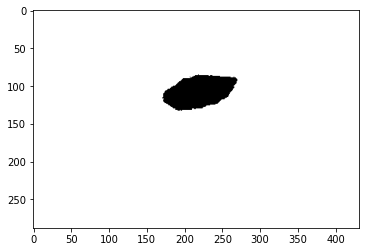

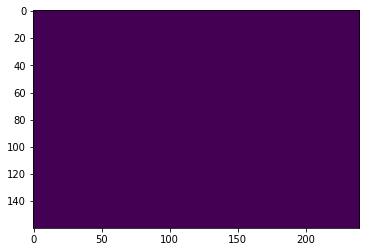

276_1.jpg


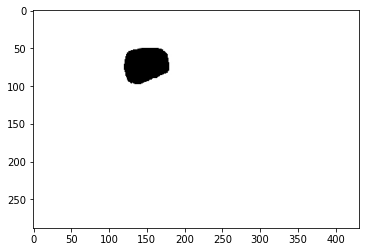

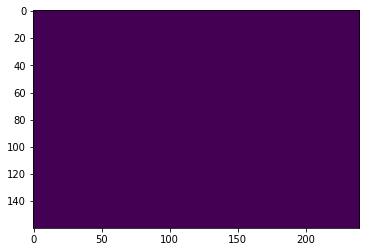

74_1.jpg


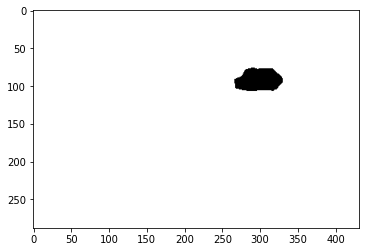

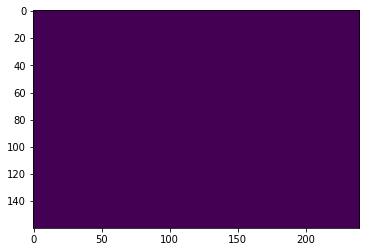

332_1.jpg


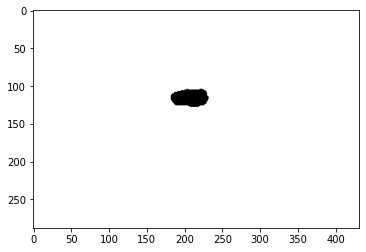

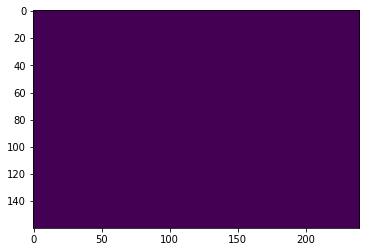

55_1.jpg


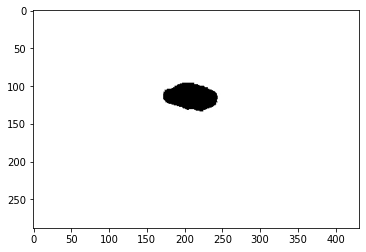

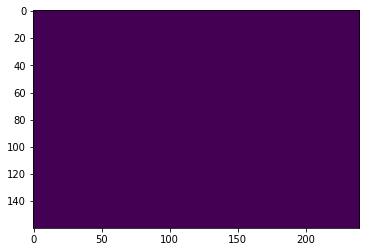

50_1.jpg


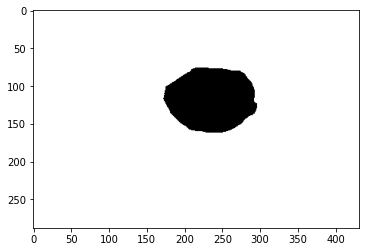

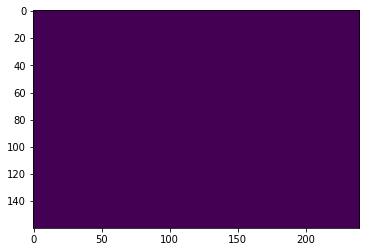

353_1.jpg


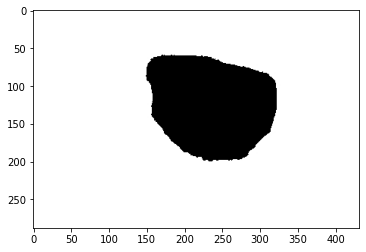

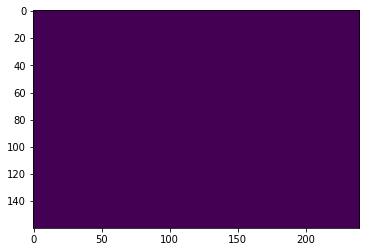

170_1.jpg


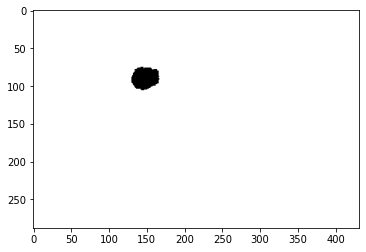

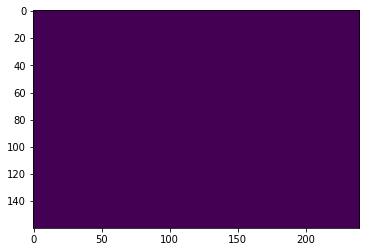

129_1.jpg


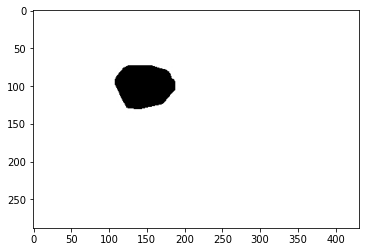

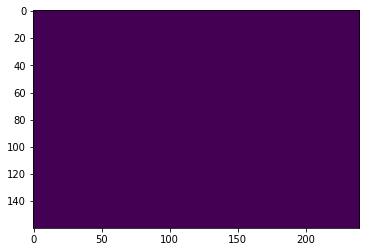

315_2.jpg


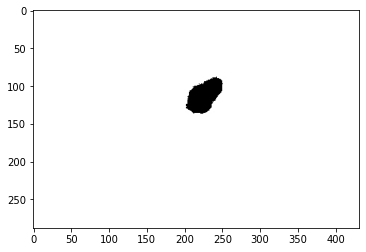

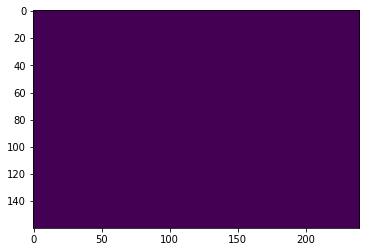

203_1.jpg


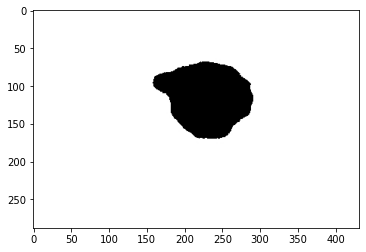

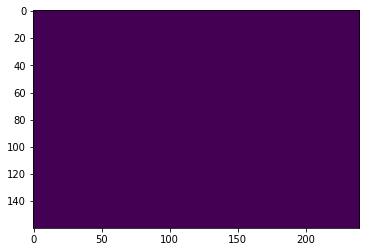

211_1.jpg


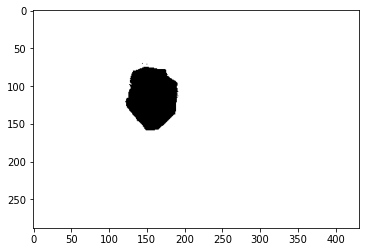

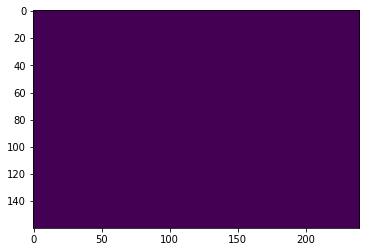

399_1.jpg


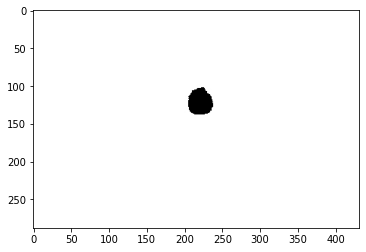

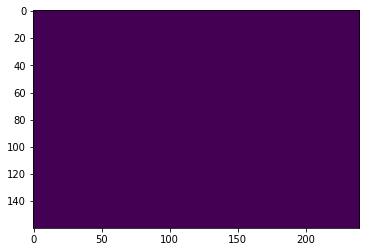

172_1.jpg


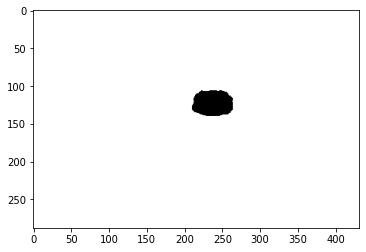

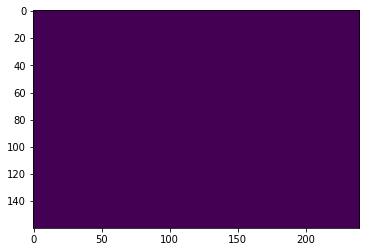

368_1.jpg


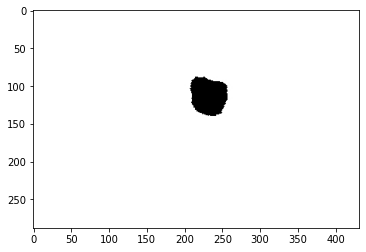

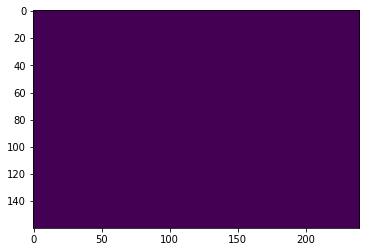

234_2.jpg


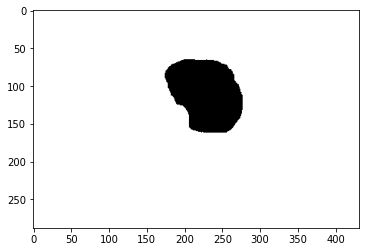

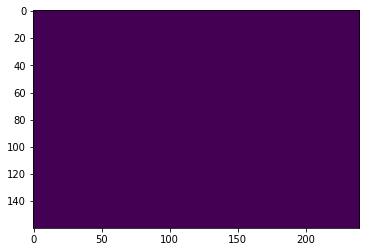

284_1.jpg


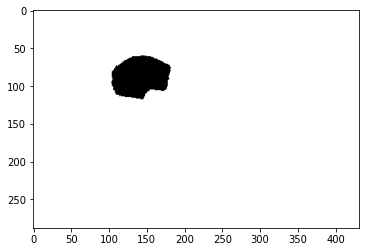

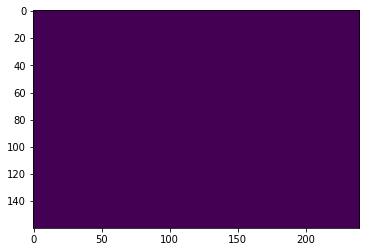

272_1.jpg


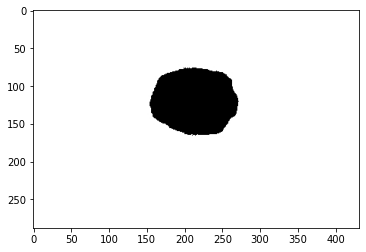

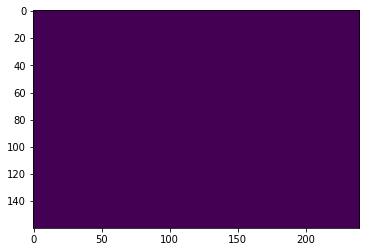

19_1.jpg


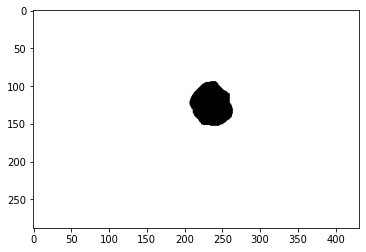

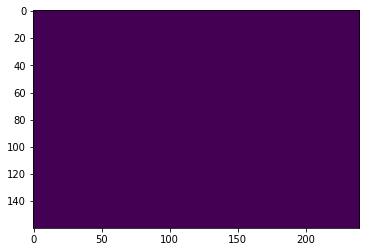

286_1.jpg


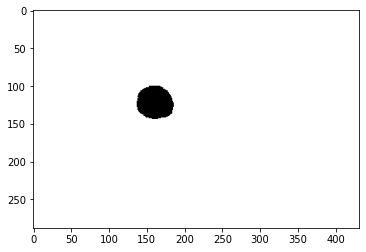

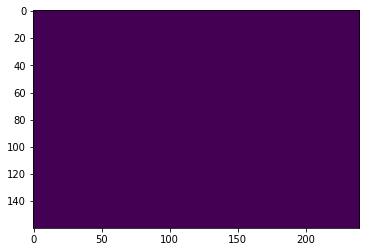

118_1.jpg


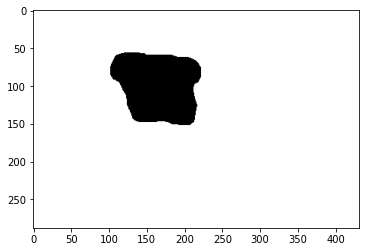

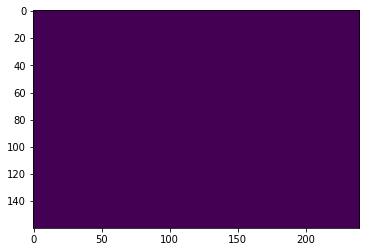

95_1.jpg


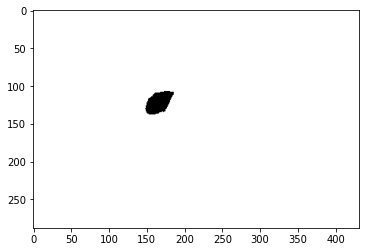

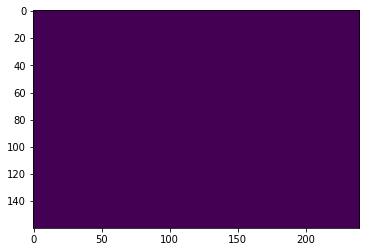

342_1.jpg


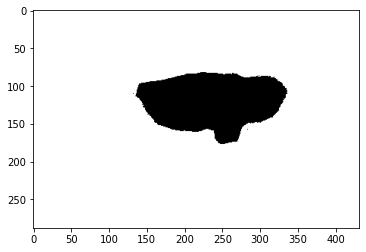

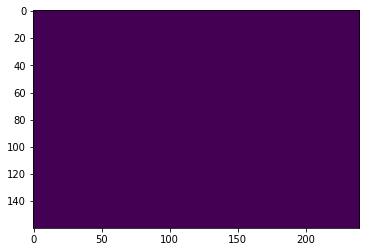

80_2.jpg


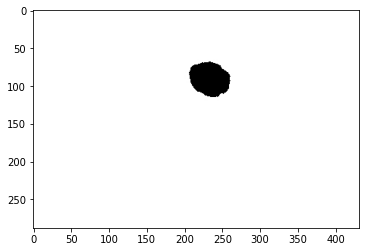

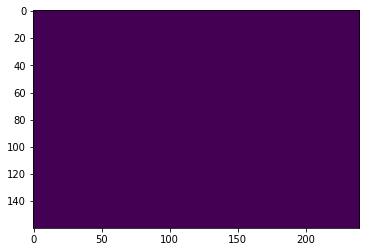

123_1.jpg


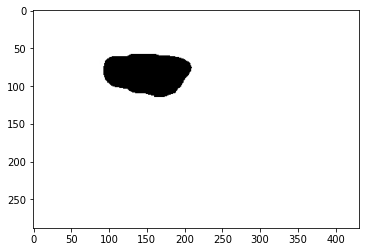

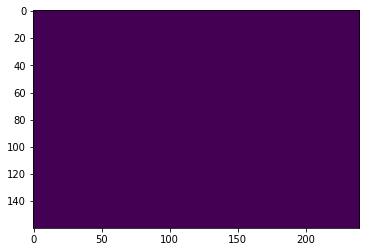

106_3.jpg


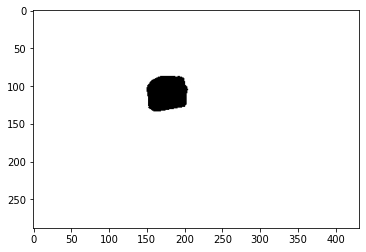

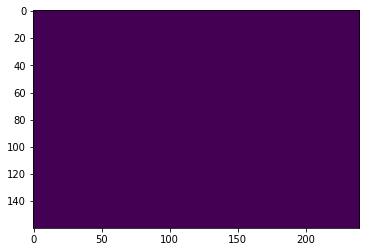

31_1.jpg


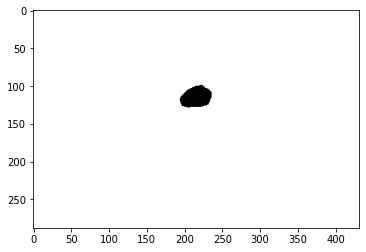

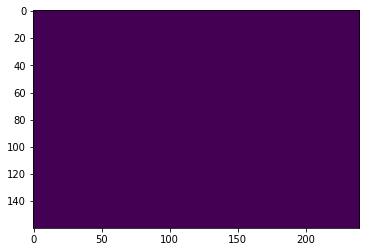

26_1.jpg


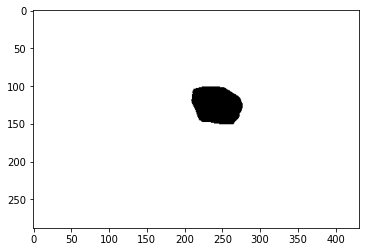

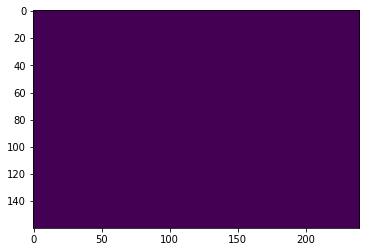

121_1.jpg


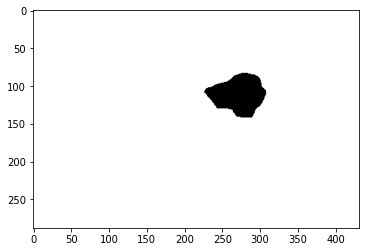

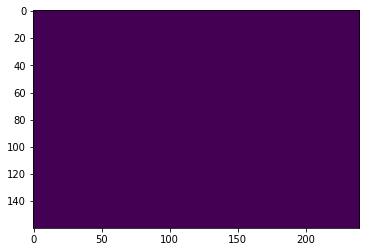

57_1.jpg


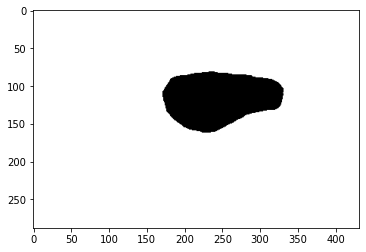

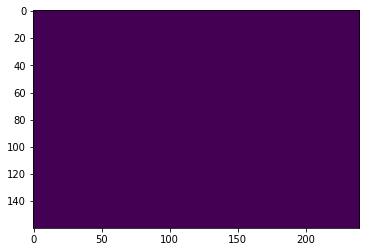

202_1.jpg


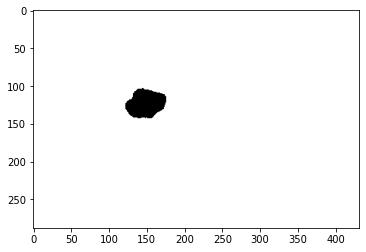

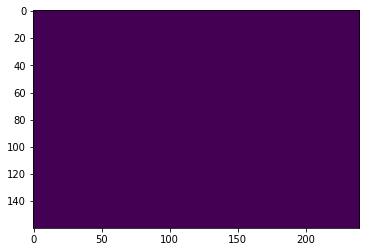

354_1.jpg


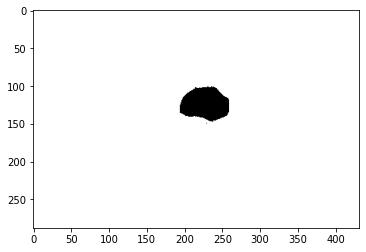

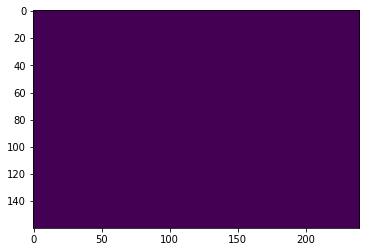

1_2.jpg


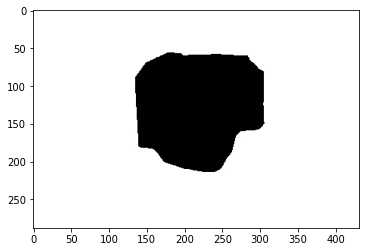

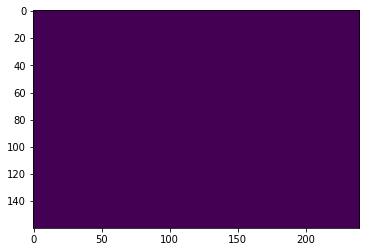

296_5.jpg


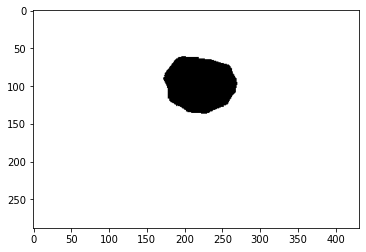

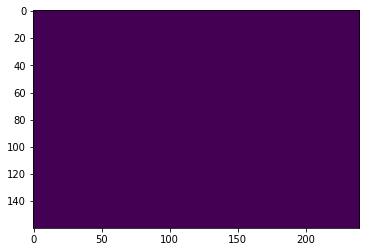

372_1.jpg


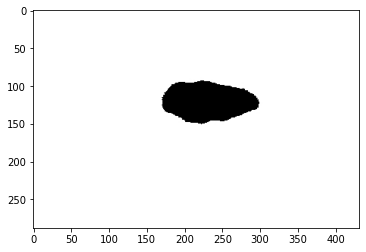

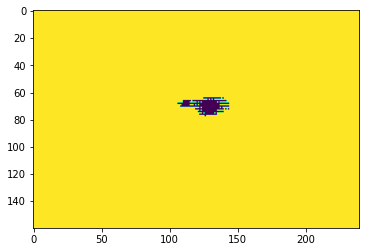

319_1.jpg


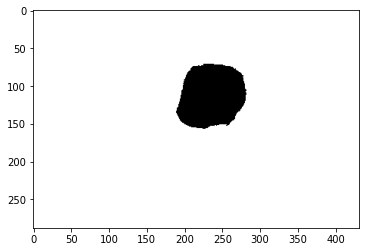

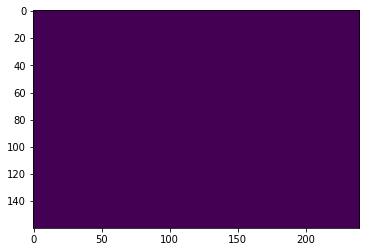

175_1.jpg


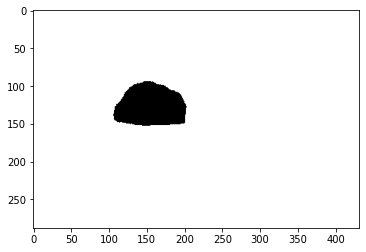

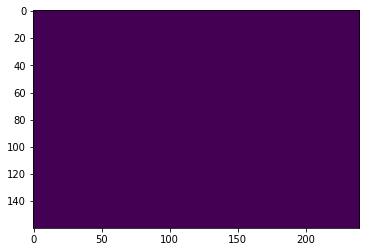

109_1.jpg


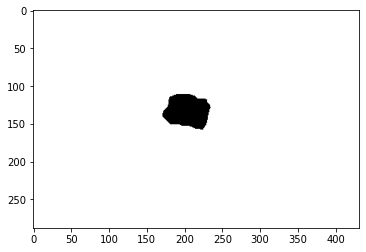

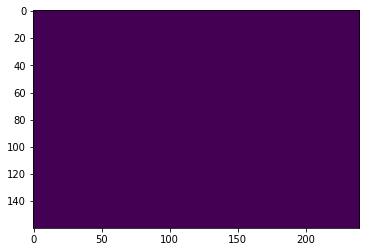

358_1.jpg


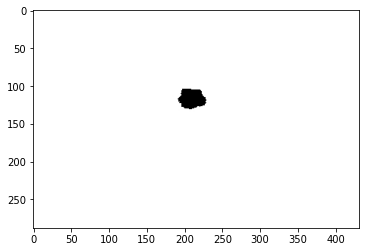

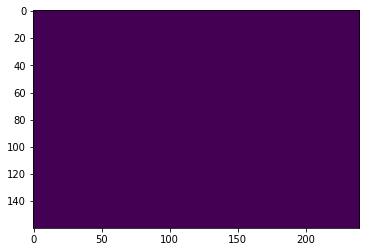

388_1.jpg


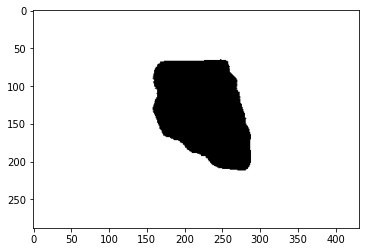

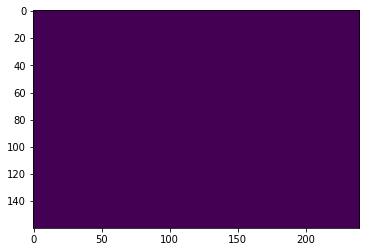

106_1.jpg


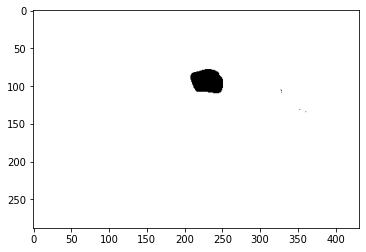

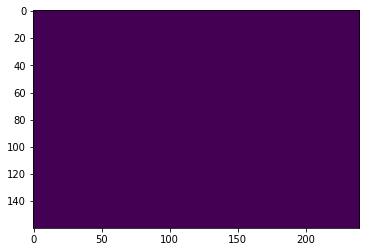

30_1.jpg


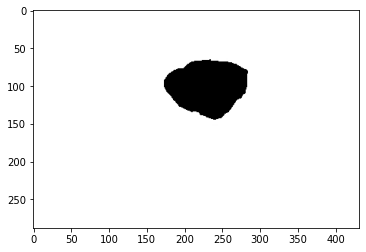

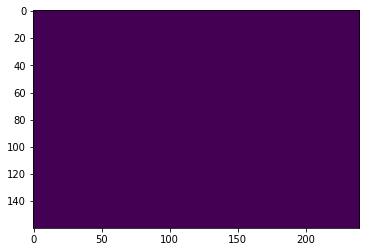

296_1.jpg


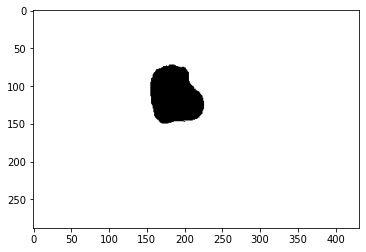

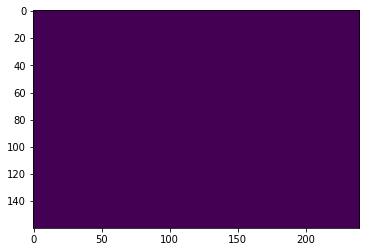

367_1.jpg


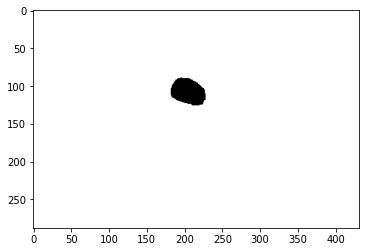

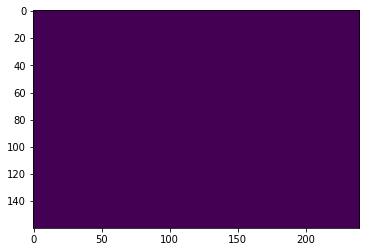

315_1.jpg


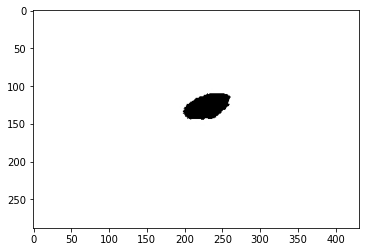

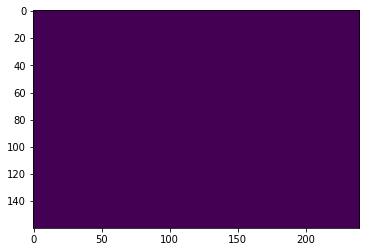

151_1.jpg


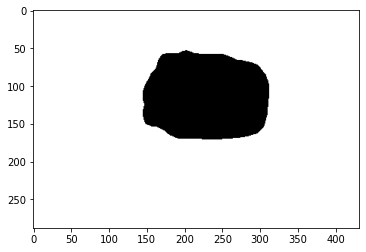

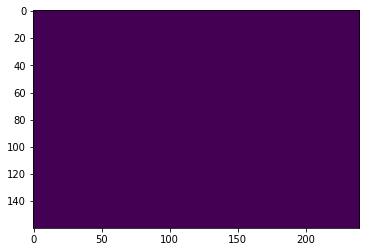

395_2.jpg


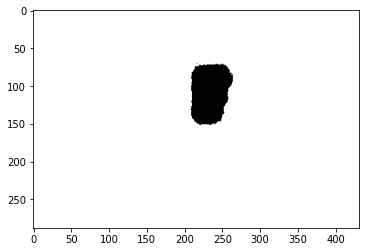

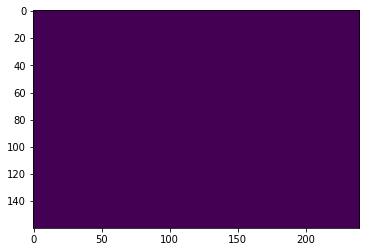

318_1.jpg


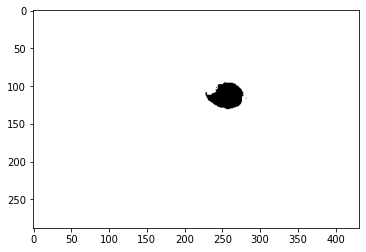

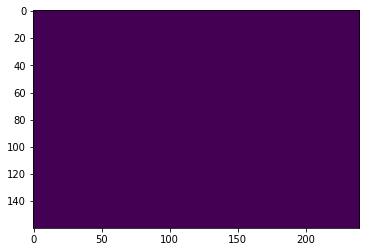

223_1.jpg


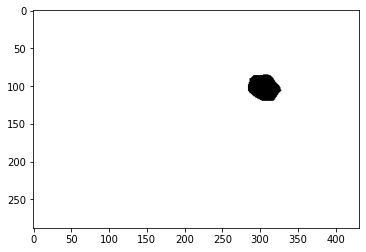

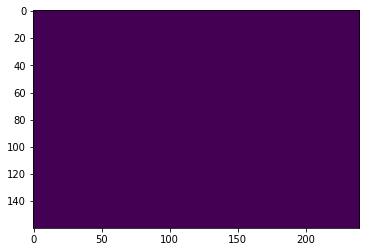

310_1.jpg


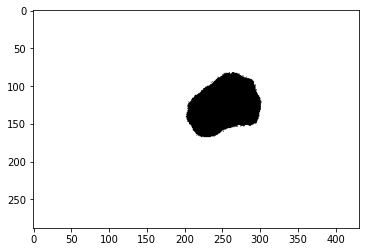

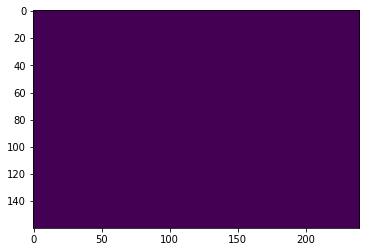

317_2.jpg


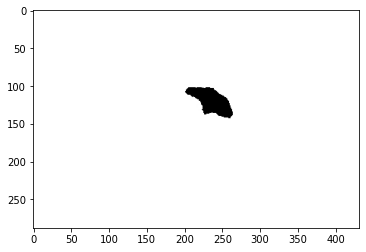

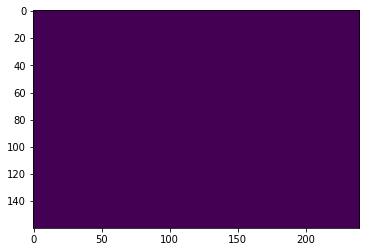

97_2.jpg


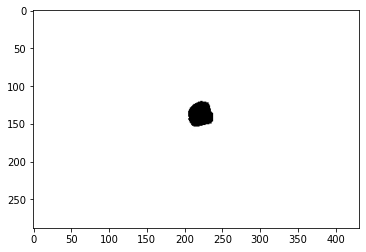

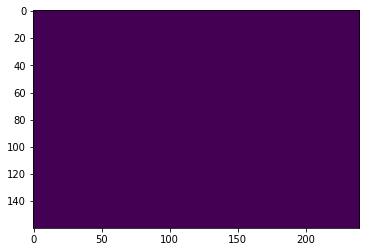

51_1.jpg


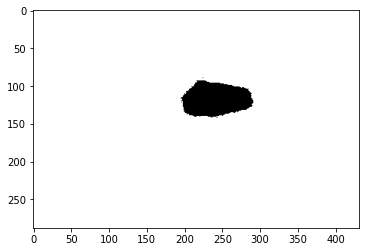

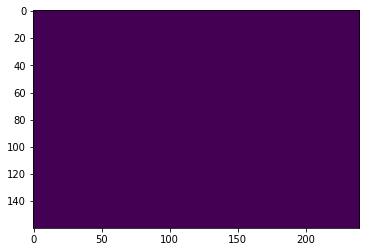

281_1.jpg


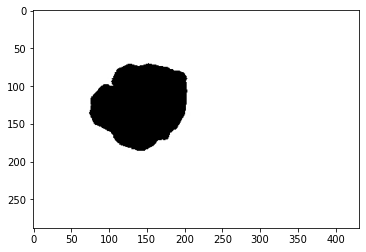

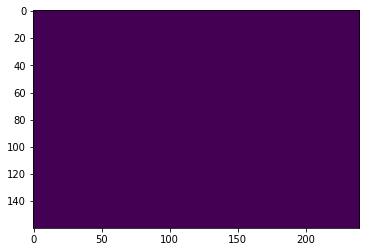

85_1.jpg


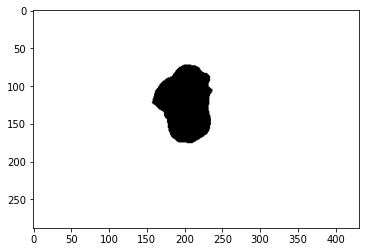

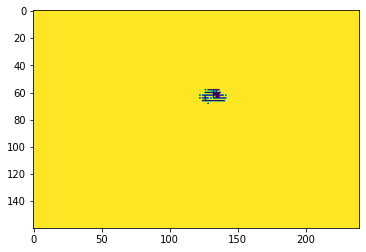

69_1.jpg


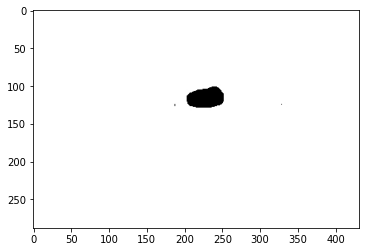

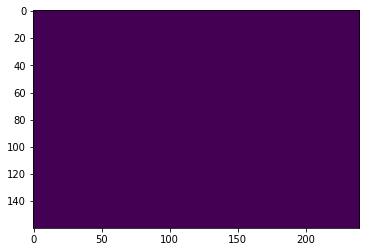

349_1.jpg


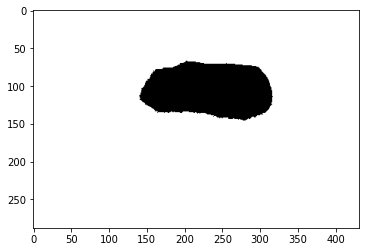

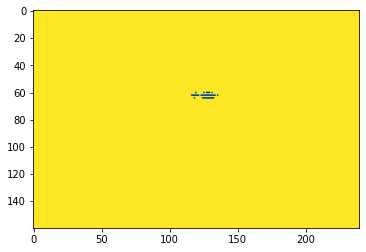

261_1.jpg


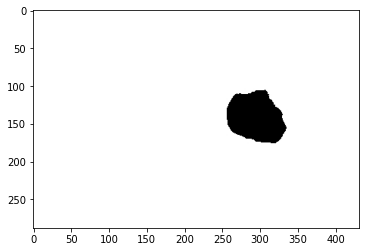

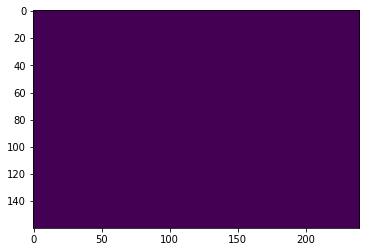

117_1.jpg


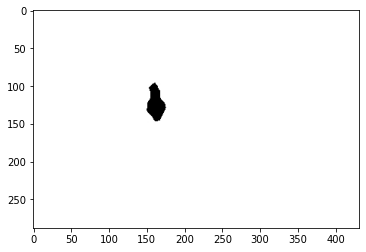

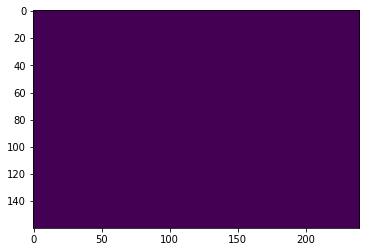

122_2.jpg


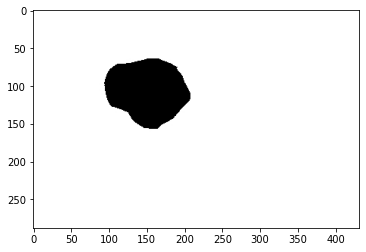

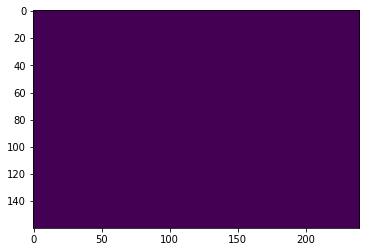

183_1.jpg


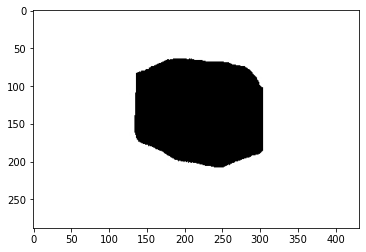

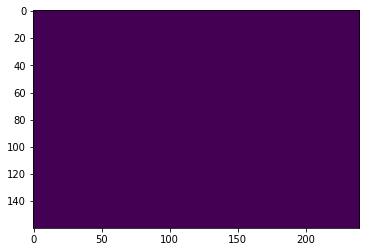


---------------------------Test accuracy---------------------------------

Got 1807676/1881600 with acc 96.07
Dice score: 48.00578308105469
LENGTH OF LOADER =  49
TYPE OF LOADER =  <class 'torch.utils.data.dataloader.DataLoader'>
49_1.jpg


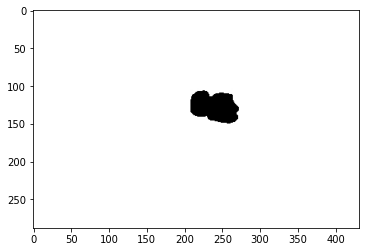

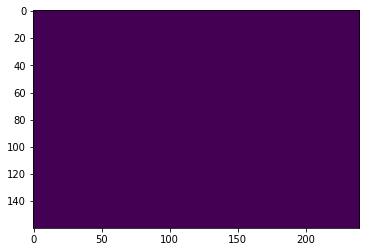

65_2.jpg


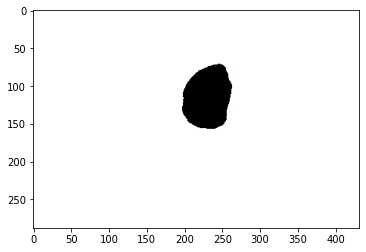

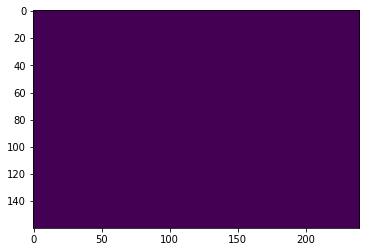

163_2.jpg


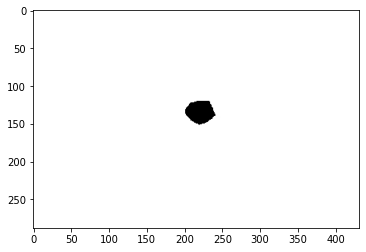

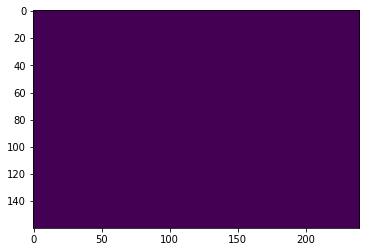

60_1.jpg


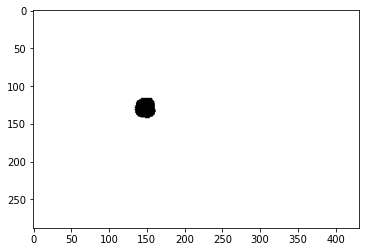

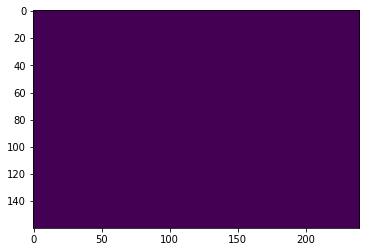

375_1.jpg


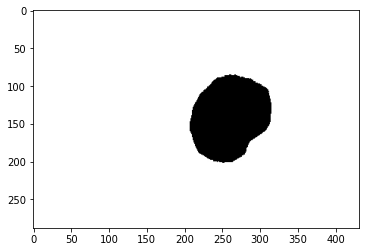

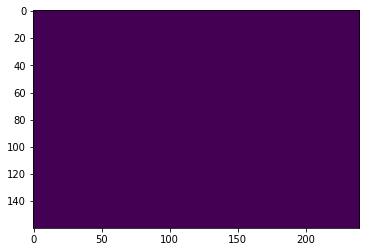

390_1.jpg


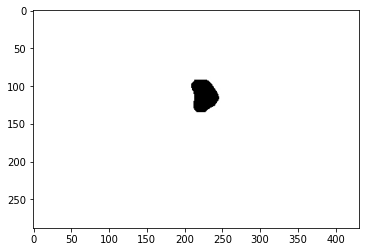

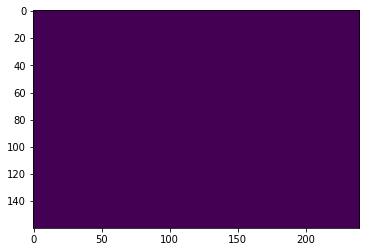

166_1.jpg


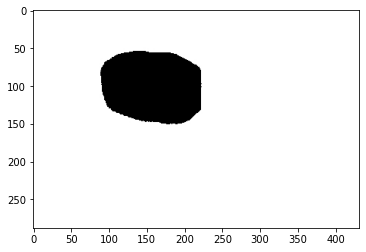

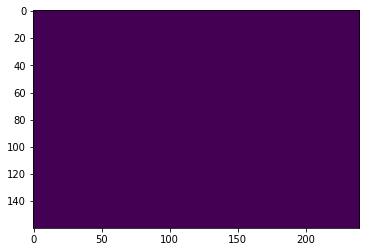

106_4.jpg


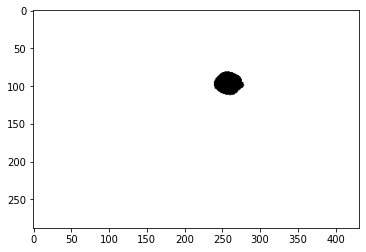

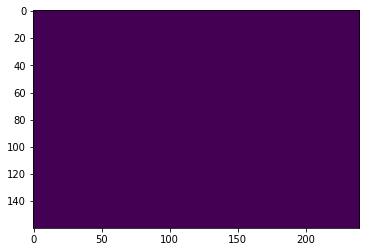

67_1.jpg


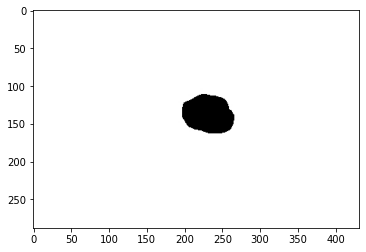

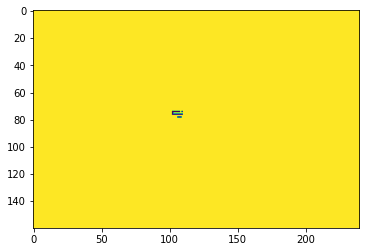

285_1.jpg


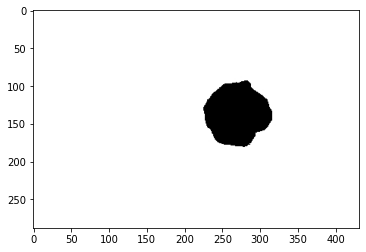

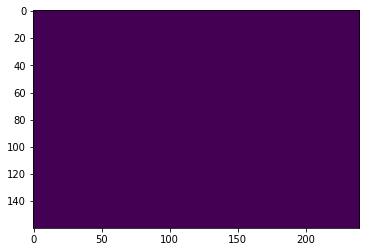

236_1.jpg


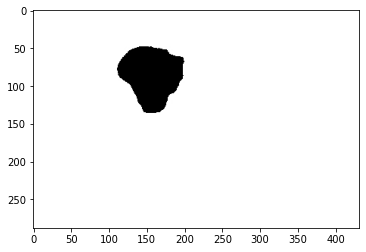

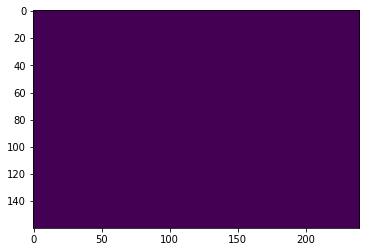

80_1.jpg


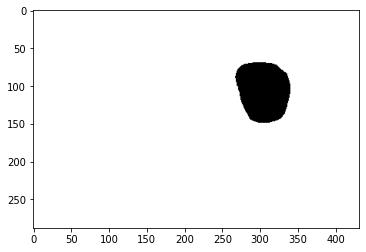

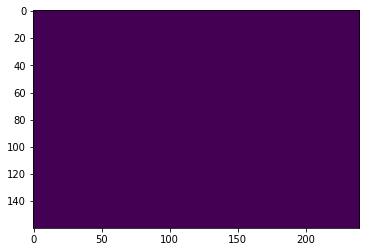

234_3.jpg


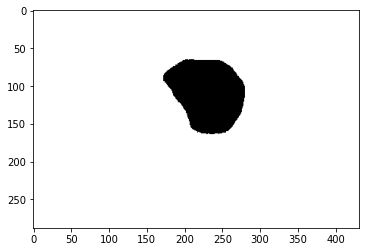

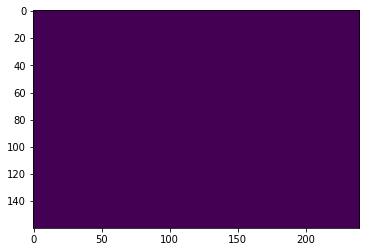

2_1.jpg


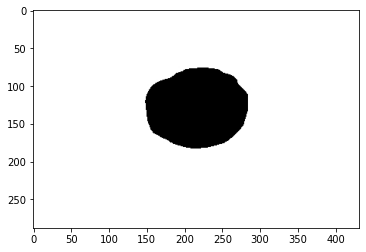

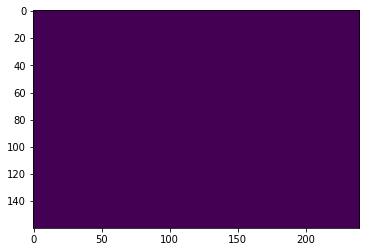

92_4.jpg


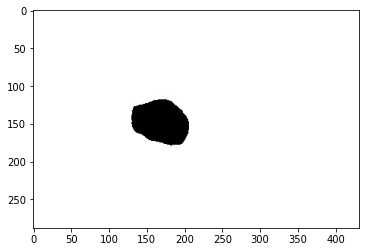

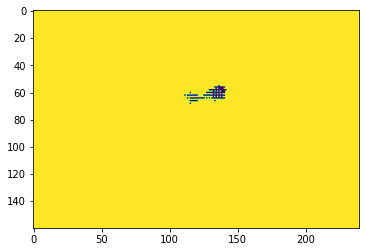

242_1.jpg


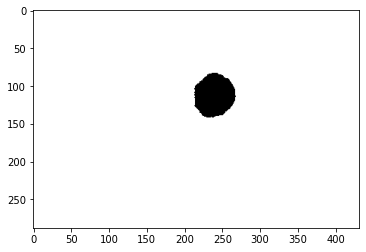

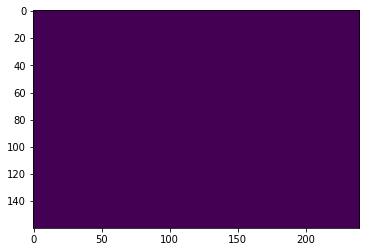

179_1.jpg


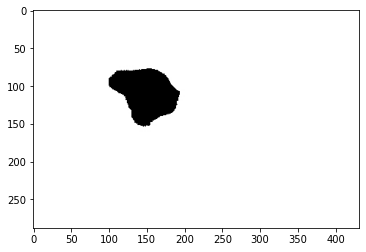

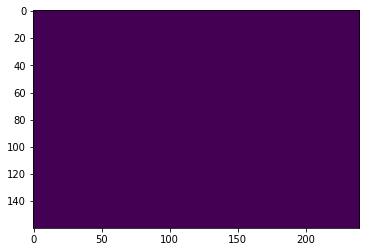

23_1.jpg


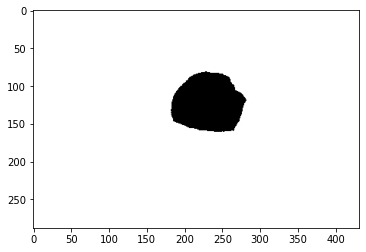

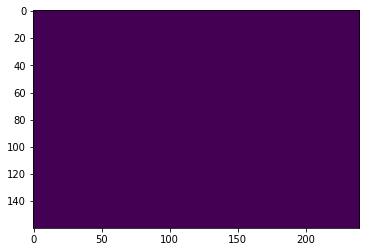

381_1.jpg


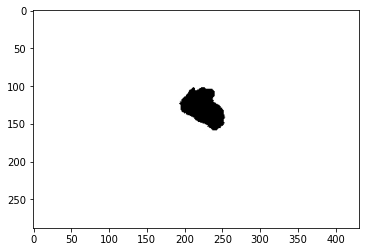

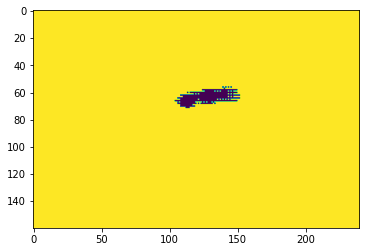

42_1.jpg


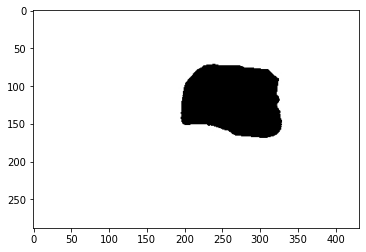

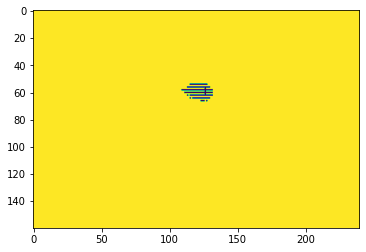

269_1.jpg


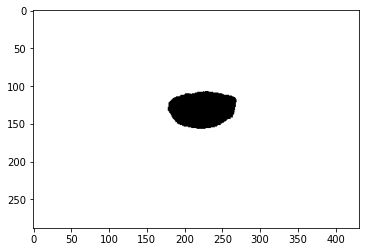

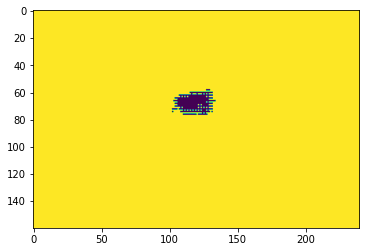

353_2.jpg


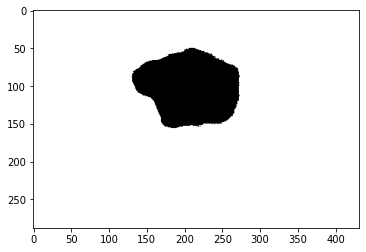

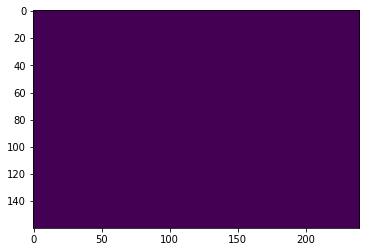

5_1.jpg


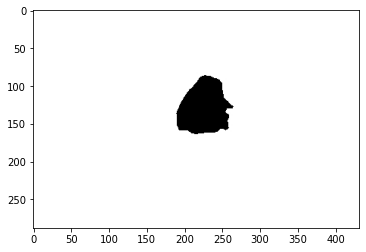

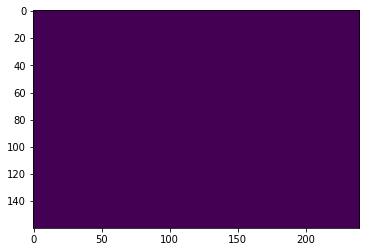

335_1.jpg


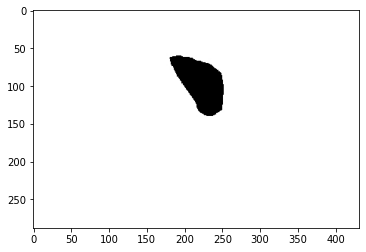

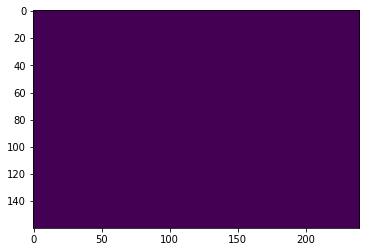

56_1.jpg


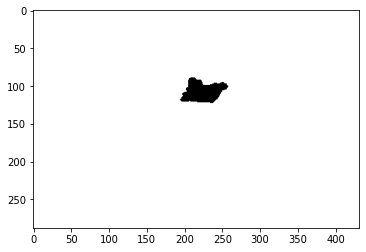

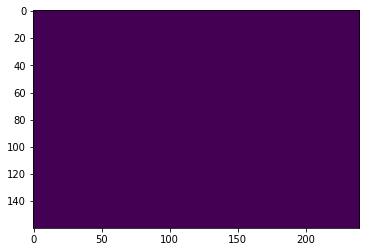

25_1.jpg


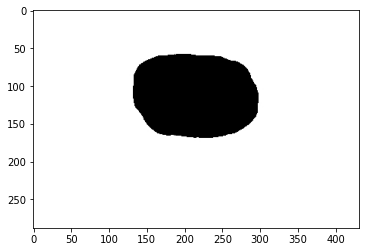

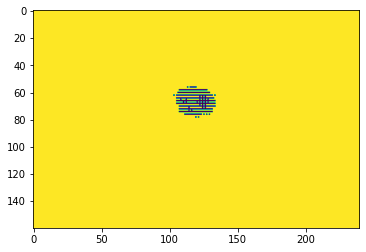

21_1.jpg


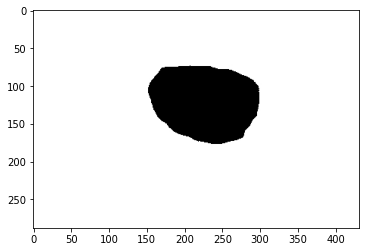

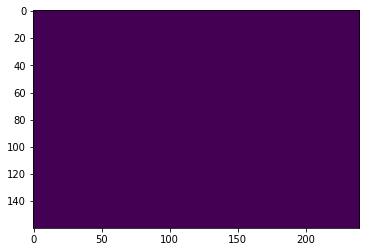

330_1.jpg


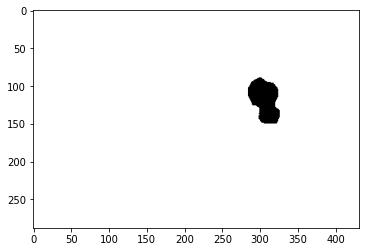

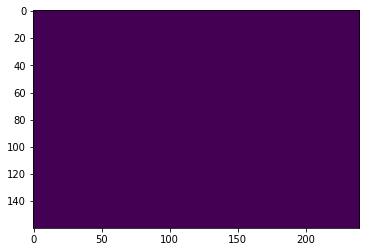

392_1.jpg


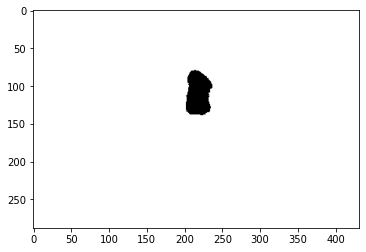

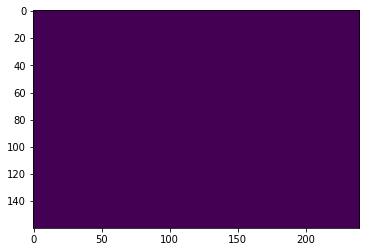

146_2.jpg


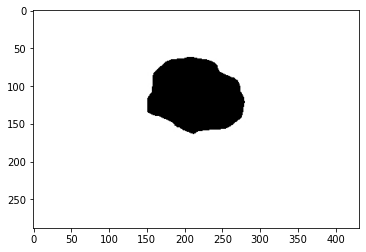

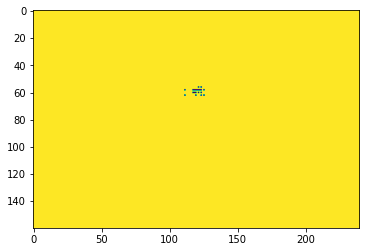

81_1.jpg


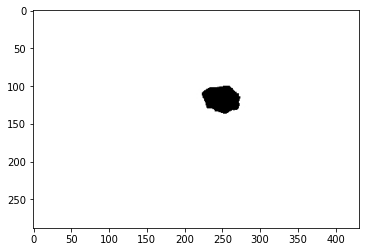

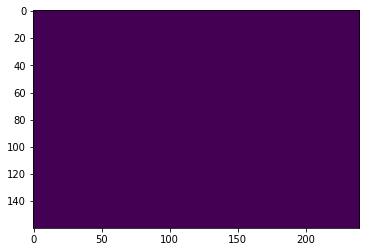

258_1.jpg


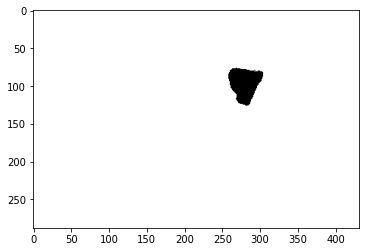

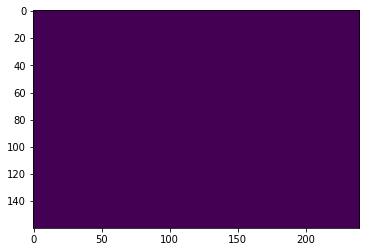

254_1.jpg


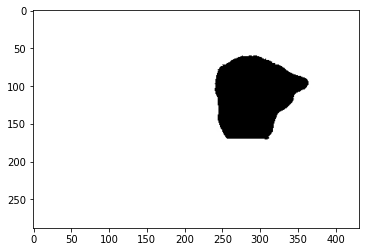

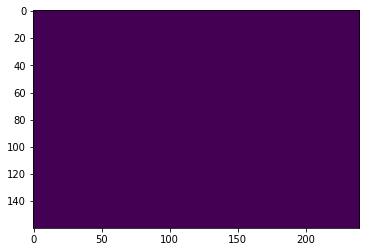

338_1.jpg


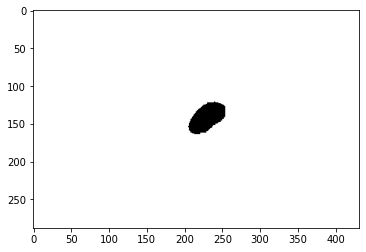

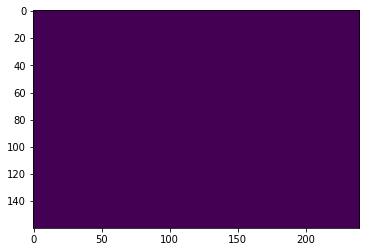

142_1.jpg


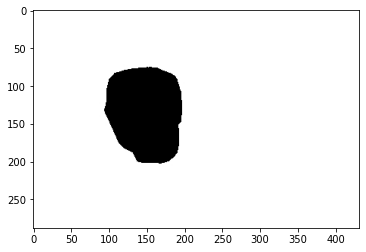

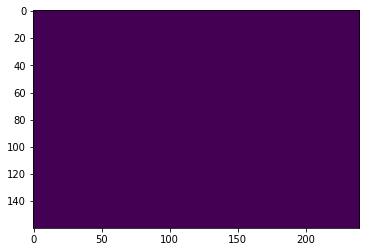

198_1.jpg


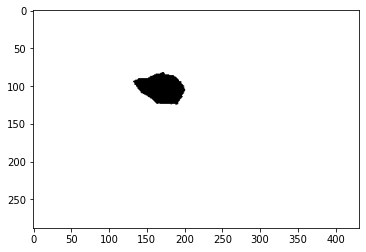

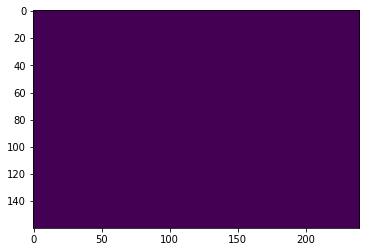

58_2.jpg


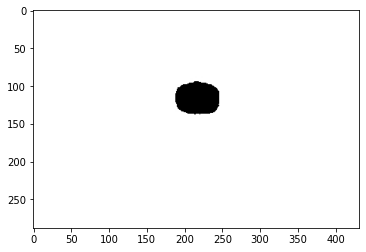

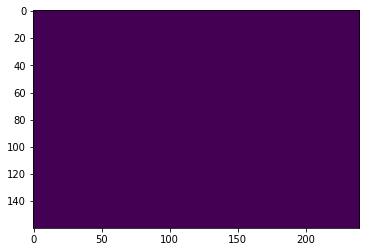

69_3.jpg


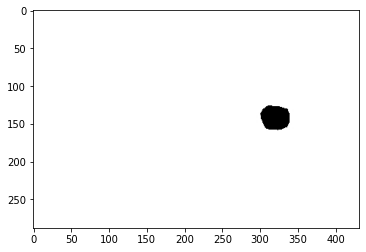

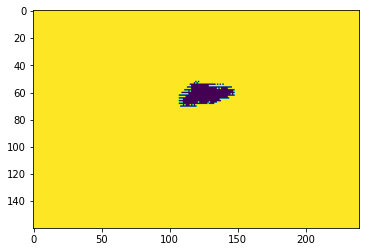

360_2.jpg


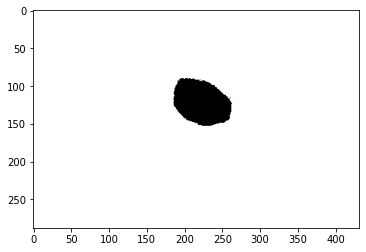

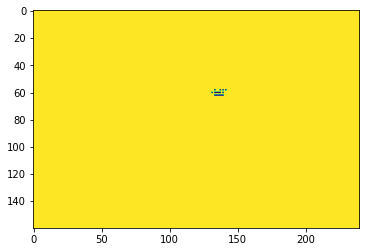

348_1.jpg


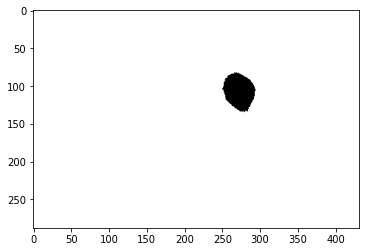

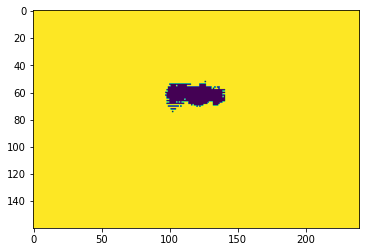

366_1.jpg


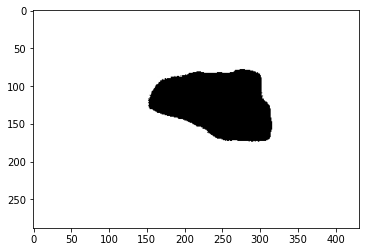

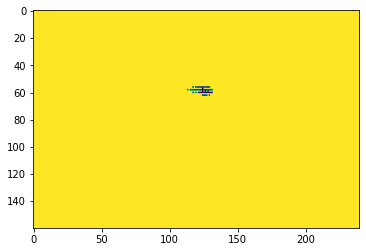

250_1.jpg


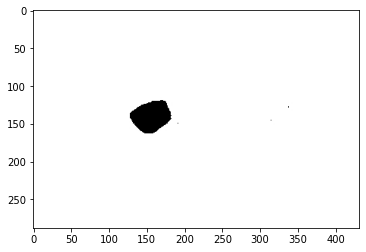

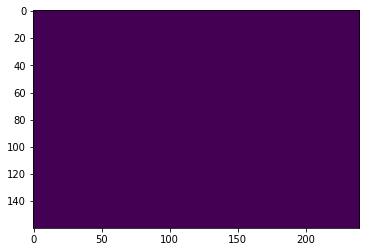

313_1.jpg


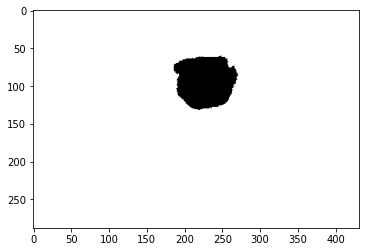

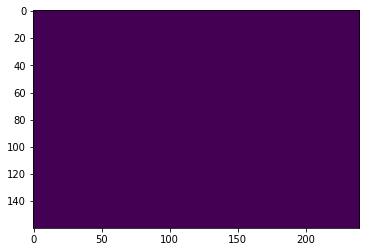

221_1.jpg


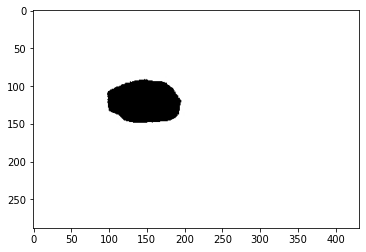

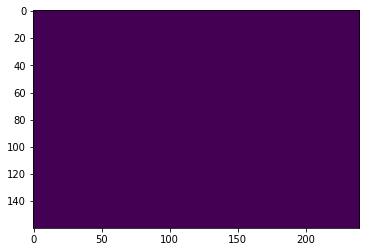

241_1.jpg


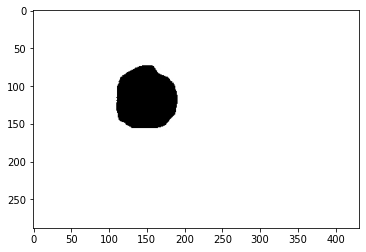

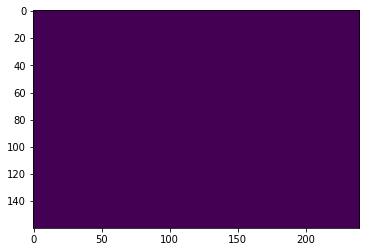

128_1.jpg


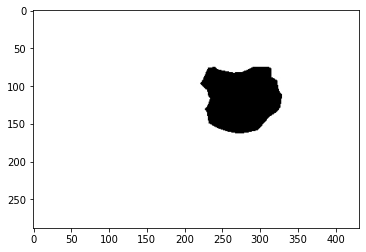

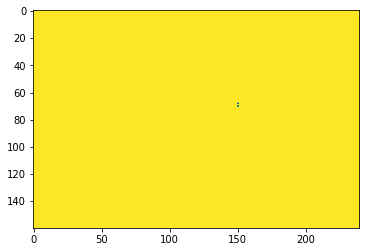

363_1.jpg


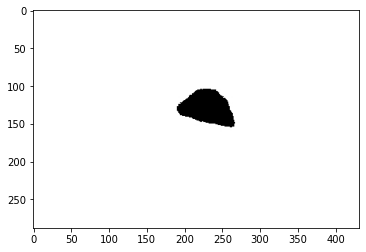

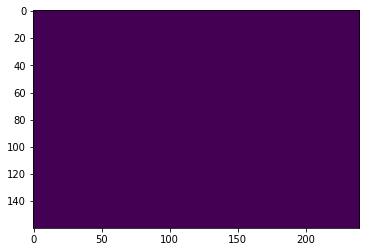

22_1.jpg


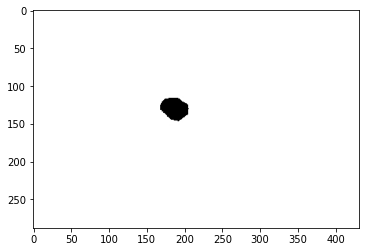

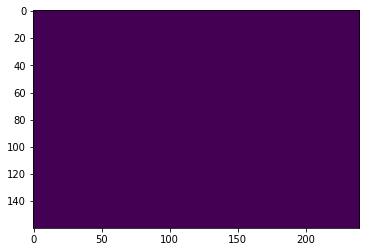

374_1.jpg


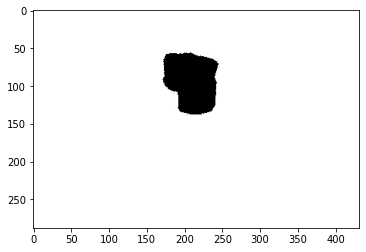

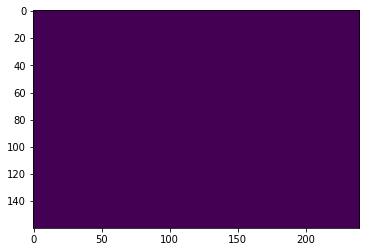

In [8]:
def train_fn(loader, model, optimizer, loss_fn, scaler):
    step = 0
    for epoch in range(NUM_EPOCHS):
        loop = tqdm(loader)
        
        for batch_idx, (data, targets, s) in enumerate(loop):
            data = data.cuda()
            targets = targets.float().unsqueeze(1).cuda()
            # forward
            with torch.cuda.amp.autocast():
                # if(c == 0):
                #     print(data, ", length = ", len(data))
                predictions = model(data)
                # if(c == 0):
                #     print(predictions, ", predictions = ", len(predictions))
                loss = loss_fn(predictions, targets)

            # backward
            optimizer.zero_grad()
            scaler.scale(loss).backward()
            scaler.step(optimizer)
            scaler.update()

            # update tqdm loop
            loop.set_postfix(loss=loss.item())
            step += 1
        check_accuracy(loader, model)

# def plot_image(preds):
#     figure, ax = plt.subplots(nrows=len(preds), ncols=2, figsize=(10, 24))
#     for i in range(len(preds)):
#         mask = preds[i]
#         ax[i, 0].imshow(mask.cpu().squeeze().numpy())
#         #ax[i, 1].imshow(mask, interpolation="nearest")
#         ax[i, 0].set_title("Augmented image")
#         #ax[i, 1].set_title("Augmented mask")
#         ax[i, 0].set_axis_off()
#         #ax[i, 1].set_axis_off()
#     plt.tight_layout()
#     plt.show()

def main():
    train_transform = A.Compose(  
        [
            A.Resize(height=IMAGE_HEIGHT, width=IMAGE_WIDTH),
            A.Rotate(limit=35, p=1.0),
            A.HorizontalFlip(p=0.5),
            A.VerticalFlip(p=0.1),
            A.Normalize(
                mean=[0.0, 0.0, 0.0],
                std=[1.0, 1.0, 1.0],
                max_pixel_value=255.0,
            ),
            ToTensorV2(),
        ],
    )

    val_transforms = A.Compose(
        [
            A.Resize(height=IMAGE_HEIGHT, width=IMAGE_WIDTH),
            A.Normalize(
                mean=[0.0, 0.0, 0.0],
                std=[1.0, 1.0, 1.0],
                max_pixel_value=255.0,
            ),
            ToTensorV2(),
        ],
    )

    test_transforms = A.Compose(
        [
            A.Resize(height=IMAGE_HEIGHT, width=IMAGE_WIDTH),
            A.Normalize(
                mean=[0.0, 0.0, 0.0],
                std=[1.0, 1.0, 1.0],
                max_pixel_value=255.0,
            ),
            ToTensorV2(),
        ],
    )

    model = UNET(in_channels=3, out_channels=1).cuda()
    loss_fn = nn.BCEWithLogitsLoss()
    optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)

    train_loader, val_loader, test_loader = get_loaders(
        TRAIN_IMG_DIR,
        TRAIN_MASK_DIR,
        VAL_IMG_DIR,
        VAL_MASK_DIR,
        TEST_IMG_DIR,
        TEST_MASK_DIR,
        BATCH_SIZE,
        train_transform,
        val_transforms,
        test_transforms,
        NUM_WORKERS,
        PIN_MEMORY,
    )

    if LOAD_MODEL:
        load_checkpoint(torch.load("my_checkpoint.pth.tar"), model)


    check_accuracy(val_loader, model, device=device)
    
    scaler = torch.cuda.amp.GradScaler()

    for epoch in range(NUM_EPOCHS):
        train_fn(train_loader, model, optimizer, loss_fn, scaler)

        # save model
        checkpoint = {
            "state_dict": model.state_dict(),
            "optimizer":optimizer.state_dict(),
        }

        save_checkpoint(checkpoint)

        # check accuracy
        check_accuracy(val_loader, model)

        # print some examples to a folder
        save_predictions_as_imgs("/DATA/bitra1/mask_images/val/", val_loader, model, folder="/DATA/bitra1/val_saved_images/")
    

    print("\n---------------------------Test accuracy---------------------------------\n")

    check_accuracy(test_loader, model)
    save_predictions_as_imgs("/DATA/bitra1/mask_images/test/", test_loader, model, folder="/DATA/bitra1/test_saved_images/")
        


if __name__ == "__main__":
    main()